#**Introduction**

In [ ]:
!pip install missingno
!pip install missingpy
!pip install scikit-learn
!pip install --upgrade scikit-learn
!pip install sklearn
!pip install -U imbalanced-learn

Welcome to the notebook for **Classification of Liver Disease Using Supervised Machine Learning with Python**. In this notebook we're going to understand the data of patients with liver disease and no liver disease, discuss about the information we can gain from it and create machine learning models to classify the patients and choose the best model.

In [1]:
# Data manipulation libraries
import numpy as np
import collections
import pandas as pd
import sys

# Visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Missing data visualization
import missingno as msno

# Machine learning libraries
import sklearn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing, feature_selection, model_selection, metrics
from sklearn import linear_model, ensemble, tree, neighbors, naive_bayes, neural_network, svm, calibration

# Imbalanced data handling
import imblearn
from imblearn import pipeline
from imblearn import over_sampling

# Special handling for sklearn.neighbors.base
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

# Statistical analysis libraries
from scipy import stats as stats
from statsmodels.stats import outliers_influence
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm


In [3]:
hcv_df= pd.read_csv('/content/file.csv')

In [4]:
hcv_df.head()

category  age sex  albumin  alkaline_phosphatase  \
0   no_disease   32   m     38.5                  52.5   
1   no_disease   32   m     38.5                  70.3   
2   no_disease   32   m     46.9                  74.7   
3   no_disease   32   m     43.2                  52.0   
4   no_disease   32   m     39.2                  74.1   

   alanine_aminotransferase  aspartate_aminotransferase  bilirubin  \
0                       7.7                        22.1        7.5   
1                      18.0                        24.7        3.9   
2                      36.2                        52.6        6.1   
3                      30.6                        22.6       18.9   
4                      32.6                        24.8        9.6   

   cholinesterase  cholesterol  creatinina  gamma_glutamyl_transferase protein  
0            6.93         3.23       106.0                        12.1      69  
1           11.17         4.80        74.0                        15.6    76.5  
2            8.84         5.20        86.0                        33.2    79.3  
3            7.33         4.74        80.0                        33.8    75.7  
4            9.15         4.32        76.0                        29.9    68.7

In [5]:
hcv_df.tail()

category  age sex  albumin  alkaline_phosphatase  \
610   cirrhosis   62   f     32.0                 416.6   
611   cirrhosis   64   f     24.0                 102.8   
612   cirrhosis   64   f     29.0                  87.3   
613   cirrhosis   46   f     33.0                   NaN   
614   cirrhosis   59   f     36.0                   NaN   

     alanine_aminotransferase  aspartate_aminotransferase  bilirubin  \
610                       5.9                       110.3       50.0   
611                       2.9                        44.4       20.0   
612                       3.5                        99.0       48.0   
613                      39.0                        62.0       20.0   
614                     100.0                        80.0       12.0   

     cholinesterase  cholesterol  creatinina  gamma_glutamyl_transferase  \
610            5.57         6.30        55.7                       650.9   
611            1.54         3.02        63.0                        35.9   
612            1.66         3.63        66.7                        64.2   
613            3.56         4.20        52.0                        50.0   
614            9.07         5.30        67.0                        34.0   

    protein  
610    68.5  
611    71.3  
612      82  
613      71  
614      68

In [6]:
hcv_df.shape

(615, 13)

In [7]:
hcv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   category                    615 non-null    object 
 1   age                         615 non-null    int64  
 2   sex                         615 non-null    object 
 3   albumin                     614 non-null    float64
 4   alkaline_phosphatase        597 non-null    float64
 5   alanine_aminotransferase    614 non-null    float64
 6   aspartate_aminotransferase  615 non-null    float64
 7   bilirubin                   615 non-null    float64
 8   cholinesterase              615 non-null    float64
 9   cholesterol                 605 non-null    float64
 10  creatinina                  615 non-null    float64
 11  gamma_glutamyl_transferase  615 non-null    float64
 12  protein                     615 non-null    object 
dtypes: float64(9), int64(1), object(3)


In [8]:
hcv_df.describe()

age     albumin  alkaline_phosphatase  alanine_aminotransferase  \
count  615.000000  614.000000            597.000000                614.000000   
mean    47.408130   41.620195             68.283920                 28.450814   
std     10.055105    5.780629             26.028315                 25.469689   
min     19.000000   14.900000             11.300000                  0.900000   
25%     39.000000   38.800000             52.500000                 16.400000   
50%     47.000000   41.950000             66.200000                 23.000000   
75%     54.000000   45.200000             80.100000                 33.075000   
max     77.000000   82.200000            416.600000                325.300000   

       aspartate_aminotransferase   bilirubin  cholinesterase  cholesterol  \
count                  615.000000  615.000000      615.000000   605.000000   
mean                    34.786341   11.396748        8.196634     5.368099   
std                     33.090690   19.673150        2.205657     1.132728   
min                     10.600000    0.800000        1.420000     1.430000   
25%                     21.600000    5.300000        6.935000     4.610000   
50%                     25.900000    7.300000        8.260000     5.300000   
75%                     32.900000   11.200000        9.590000     6.060000   
max                    324.000000  254.000000       16.410000     9.670000   

        creatinina  gamma_glutamyl_transferase  
count   615.000000                  615.000000  
mean     81.287805                   39.533171  
std      49.756166                   54.661071  
min       8.000000                    4.500000  
25%      67.000000                   15.700000  
50%      77.000000                   23.300000  
75%      88.000000                   40.200000  
max    1079.100000                  650.900000

In [9]:
# Checking For Duplicate values
hcv_df.isna().sum()

category                       0
age                            0
sex                            0
albumin                        1
alkaline_phosphatase          18
alanine_aminotransferase       1
aspartate_aminotransferase     0
bilirubin                      0
cholinesterase                 0
cholesterol                   10
creatinina                     0
gamma_glutamyl_transferase     0
protein                        0
dtype: int64

In [10]:
# Checking For Null values
hcv_df.isnull().sum()

category                       0
age                            0
sex                            0
albumin                        1
alkaline_phosphatase          18
alanine_aminotransferase       1
aspartate_aminotransferase     0
bilirubin                      0
cholinesterase                 0
cholesterol                   10
creatinina                     0
gamma_glutamyl_transferase     0
protein                        0
dtype: int64

In [11]:
mean_ratio = hcv_df['alkaline_phosphatase'].mean()
mean_ratio

68.28391959798995

In [12]:
hcv_df = hcv_df.fillna(mean_ratio)

In [13]:
hcv_df.isnull().sum()

category                      0
age                           0
sex                           0
albumin                       0
alkaline_phosphatase          0
alanine_aminotransferase      0
aspartate_aminotransferase    0
bilirubin                     0
cholinesterase                0
cholesterol                   0
creatinina                    0
gamma_glutamyl_transferase    0
protein                       0
dtype: int64

In [14]:
print('Number of Columns: {0}'.format(len(hcv_df.columns)))

hcv_df.columns

Number of Columns: 13


Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase', 'protein'],
      dtype='object')

**Dropping Column(s): Unnamed: 0**

In [15]:
#hcv_df.drop(columns=hcv_df.columns[0], axis=1, inplace=True)

In [16]:
print('Number of Columns: {0}'.format(len(hcv_df.columns)))

hcv_df.columns

Number of Columns: 13


Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase', 'protein'],
      dtype='object')

In [17]:
hematological_features = ['albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase', 'protein']

**Checking for Duplicate Rows**

In [18]:
hcv_df.duplicated().sum()

0

**Checking for Unique Values**

In [19]:
hcv_df.nunique()

category                        5
age                            49
sex                             2
albumin                       190
alkaline_phosphatase          415
alanine_aminotransferase      342
aspartate_aminotransferase    297
bilirubin                     188
cholinesterase                407
cholesterol                   314
creatinina                    117
gamma_glutamyl_transferase    358
protein                       199
dtype: int64

**Distribution and Visualization of Features, both individually and in terms of target feature**

In [20]:
hcv_df['category'].nunique()

5

In [21]:
hcv_df.category.value_counts(dropna=False)

 no_disease        533
 cirrhosis          30
 hepatitis          24
 fibrosis           21
suspect_disease      7
Name: category, dtype: int64

In [22]:
#Percentage checking

hcv_df.category.value_counts(normalize=True)*100

 no_disease        86.666667
 cirrhosis          4.878049
 hepatitis          3.902439
 fibrosis           3.414634
suspect_disease     1.138211
Name: category, dtype: float64

**Visualization of Categorical Features: Count Plot**

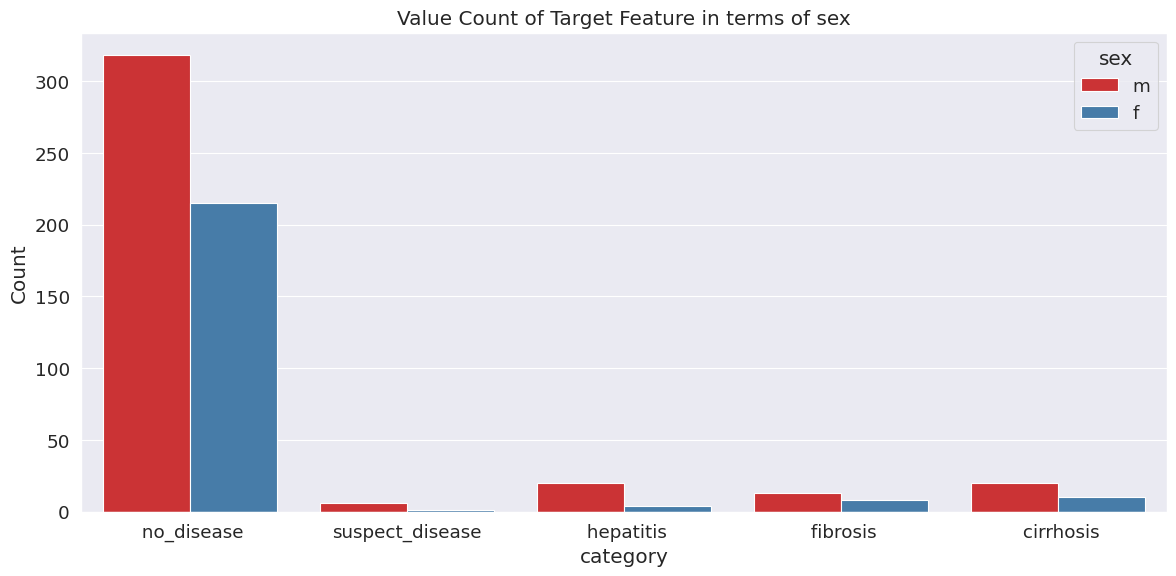

In [23]:
plt.figure(figsize=(12, 6))
sns.set_theme(context='paper', font_scale=1.5)
countplot = sns.countplot(x='category', hue='sex',  palette="Set1", data=hcv_df)
countplot.set_ylabel("Count")
countplot.set_title("Value Count of Target Feature in terms of sex")
plt.tight_layout()

In [24]:
hcv_df.groupby(['category'], dropna=False)['sex'].value_counts()

category         sex
 cirrhosis       m       20
                 f       10
 fibrosis        m       13
                 f        8
 hepatitis       m       20
                 f        4
 no_disease      m      318
                 f      215
suspect_disease  m        6
                 f        1
Name: sex, dtype: int64

The following table shows the central tendency (mean) of rest of the features except the 'sex' feature with respect to the target feature.


In [25]:
hcv_df.groupby(['category','sex'], dropna=False).mean()

<ipython-input-25-636db286f947>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hcv_df.groupby(['category','sex'], dropna=False).mean()


age    albumin  alkaline_phosphatase  \
category        sex                                               
 cirrhosis      f    55.500000  33.200000            114.766784   
                m    52.450000  33.914196             74.966784   
 fibrosis       f    53.750000  40.375000             53.404460   
                m    51.461538  42.615385             49.339969   
 hepatitis      f    46.250000  42.500000             31.975000   
                m    37.200000  44.100000             48.067588   
 no_disease     f    47.106977  40.971163             67.398140   
                m    47.147799  43.094969             69.018868   
suspect_disease f    59.000000  19.300000            208.200000   
                m    57.333333  25.250000             90.483333   

                     alanine_aminotransferase  aspartate_aminotransferase  \
category        sex                                                         
 cirrhosis      f                   19.210000                   95.390000   
                m                   24.850000                  113.490000   
 fibrosis       f                   57.662500                   72.087500   
                m                   60.792308                   86.761538   
 hepatitis      f                   12.100000                   53.850000   
                m                   31.929196                   80.110000   
 no_disease     f                   20.985581                   23.675349   
                m                   30.448742                   28.492138   
suspect_disease f                  325.300000                  146.600000   
                m                   64.916667                   58.400000   

                     bilirubin  cholinesterase  cholesterol  creatinina  \
category        sex                                                       
 cirrhosis      f    42.600000        4.840000     4.370000  122.970000   
                m    67.400000        3.307500    10.255392  145.850000   
 fibrosis       f    12.000000        7.786250    12.597990   71.387500   
                m    14.307692        8.672308     4.570000   74.784615   
 hepatitis      f    11.250000        7.737500     5.077500   59.525000   
                m    16.500000        9.593000     5.103500   76.845000   
 no_disease     f     6.901860        7.870651     7.249086   69.297674   
                m     9.626730        8.754686     5.690075   85.522013   
suspect_disease f     6.900000        5.330000     4.720000   32.000000   
                m     4.316667        7.838333     4.406667   66.666667   

                     gamma_glutamyl_transferase  
category        sex                              
 cirrhosis      f                    138.660000  
                m                    124.830000  
 fibrosis       f                     62.112500  
                m                     90.284615  
 hepatitis      f                     57.075000  
                m                     99.680000  
 no_disease     f                     22.423721  
                m                     33.507862  
suspect_disease f                    295.600000  
                m                    127.500000

**Parallel Coordinate Plot For Comparison of Numerical Features in terms of Target Feature**

In [26]:
parallel = hcv_df.copy()
parallel = parallel.drop(['sex'], axis=1)

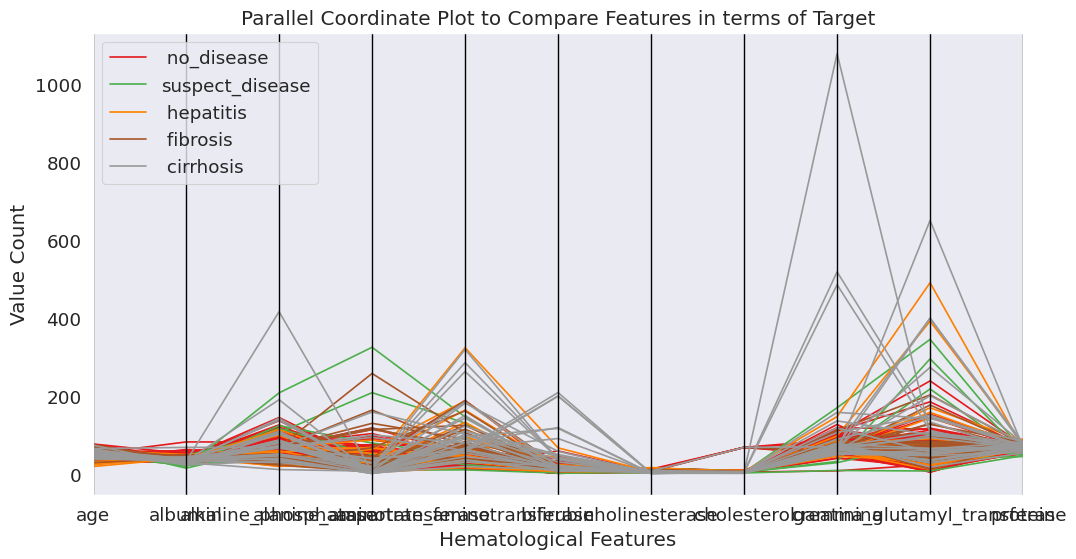

In [27]:
# Assuming 'parallel' is your DataFrame
# Replace 'NA' values with NaN, considering possible leading/trailing spaces
parallel.replace(r'^\s*NA\s*$', np.nan, regex=True, inplace=True)

# Drop rows with missing values
parallel.dropna(inplace=True)

# Create the parallel coordinates plot
plt.figure(figsize=(12, 6))
parallel_plot = pd.plotting.parallel_coordinates(parallel, 'category', colormap=plt.get_cmap("Set1"))
parallel_plot.set_title("Parallel Coordinate Plot to Compare Features in terms of Target")
parallel_plot.set_xlabel("Hematological Features")
parallel_plot.set_ylabel("Value Count")
plt.legend(loc='upper left')
plt.show()


From the Parallel Coordinate plot we can see that too high of a value (e.g. >200) indicates the existence of liver disease. Also, it shows us that the chances of the stage of the disease being Cirrhosis is higher than other stages when the values is approximately >200.

**Sankey Plot to visualize the mean distribution for different Categories**

In [28]:
hcv_df.groupby(['category'], dropna=False).mean()

<ipython-input-28-c0474ad89ff4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hcv_df.groupby(['category'], dropna=False).mean()


age    albumin  alkaline_phosphatase  \
category                                                      
 cirrhosis       53.466667  33.676131             88.233451   
 fibrosis        52.333333  41.761905             50.888346   
 hepatitis       38.708333  43.833333             45.385490   
 no_disease      47.131332  42.238274             68.365103   
suspect_disease  57.571429  24.400000            107.300000   

                 alanine_aminotransferase  aspartate_aminotransferase  \
category                                                                
 cirrhosis                      22.970000                  107.456667   
 fibrosis                       59.600000                   81.171429   
 hepatitis                      28.624330                   75.733333   
 no_disease                     26.631520                   26.549156   
suspect_disease                102.114286                   71.000000   

                 bilirubin  cholinesterase  cholesterol  creatinina  \
category                                                              
 cirrhosis       59.133333        3.818333     8.293595  138.223333   
 fibrosis        13.428571        8.334762     7.628282   73.490476   
 hepatitis       15.625000        9.283750     5.099167   73.958333   
 no_disease       8.527580        8.398086     6.318945   78.977486   
suspect_disease   4.685714        7.480000     4.451429   61.714286   

                 gamma_glutamyl_transferase  
category                                     
 cirrhosis                       129.440000  
 fibrosis                         79.552381  
 hepatitis                        92.579167  
 no_disease                       29.036773  
suspect_disease                  151.514286

In [29]:
feature_mean_list = []

for item in hematological_features:
    # Convert the column to numeric, coercing non-numeric values to NaN
    hcv_df[item] = pd.to_numeric(hcv_df[item], errors='coerce')

    # Calculate the mean for each category
    feature_mean_list.append(list(hcv_df.groupby(by='category', dropna=False)[item].mean().values))


In [30]:
label_list = ['albumin', 'alkaline_phosphatase','alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina','gamma_glutamyl_transferase','protein' ,
              ' no_disease', 'suspect_disease', ' hepatitis',' fibrosis',' cirrhosis']

In [31]:
#defines how many links will generate for each source
source = []
for index, item in enumerate(feature_mean_list):
  for inner_item in item:
    source.append(index)

In [32]:
#defines which link will hit/reach which target
target = []
for item in feature_mean_list:
  for i in range(10,15):
    target.append(i)

In [33]:
#defines the width/value of links
link_value = [inner_item for item in feature_mean_list for inner_item in item ]

In [34]:
fig = go.Figure(data=[go.Sankey(
    node = {"label": label_list},
    link = {"source": source, "target": target, "value": link_value}
    )])

fig.show()

We notice that the mean for 'cirrhosis', 'fibrosis', 'hepatitis' and 'suspect_disease' in severable variables are higher/lower by a lot than the mean for 'no_disease'.

**Scatter Plot to compare between features**

Correlation between aspartate_aminotransferase and gamma_glutamyl_transferase is: 0.4912625489339381


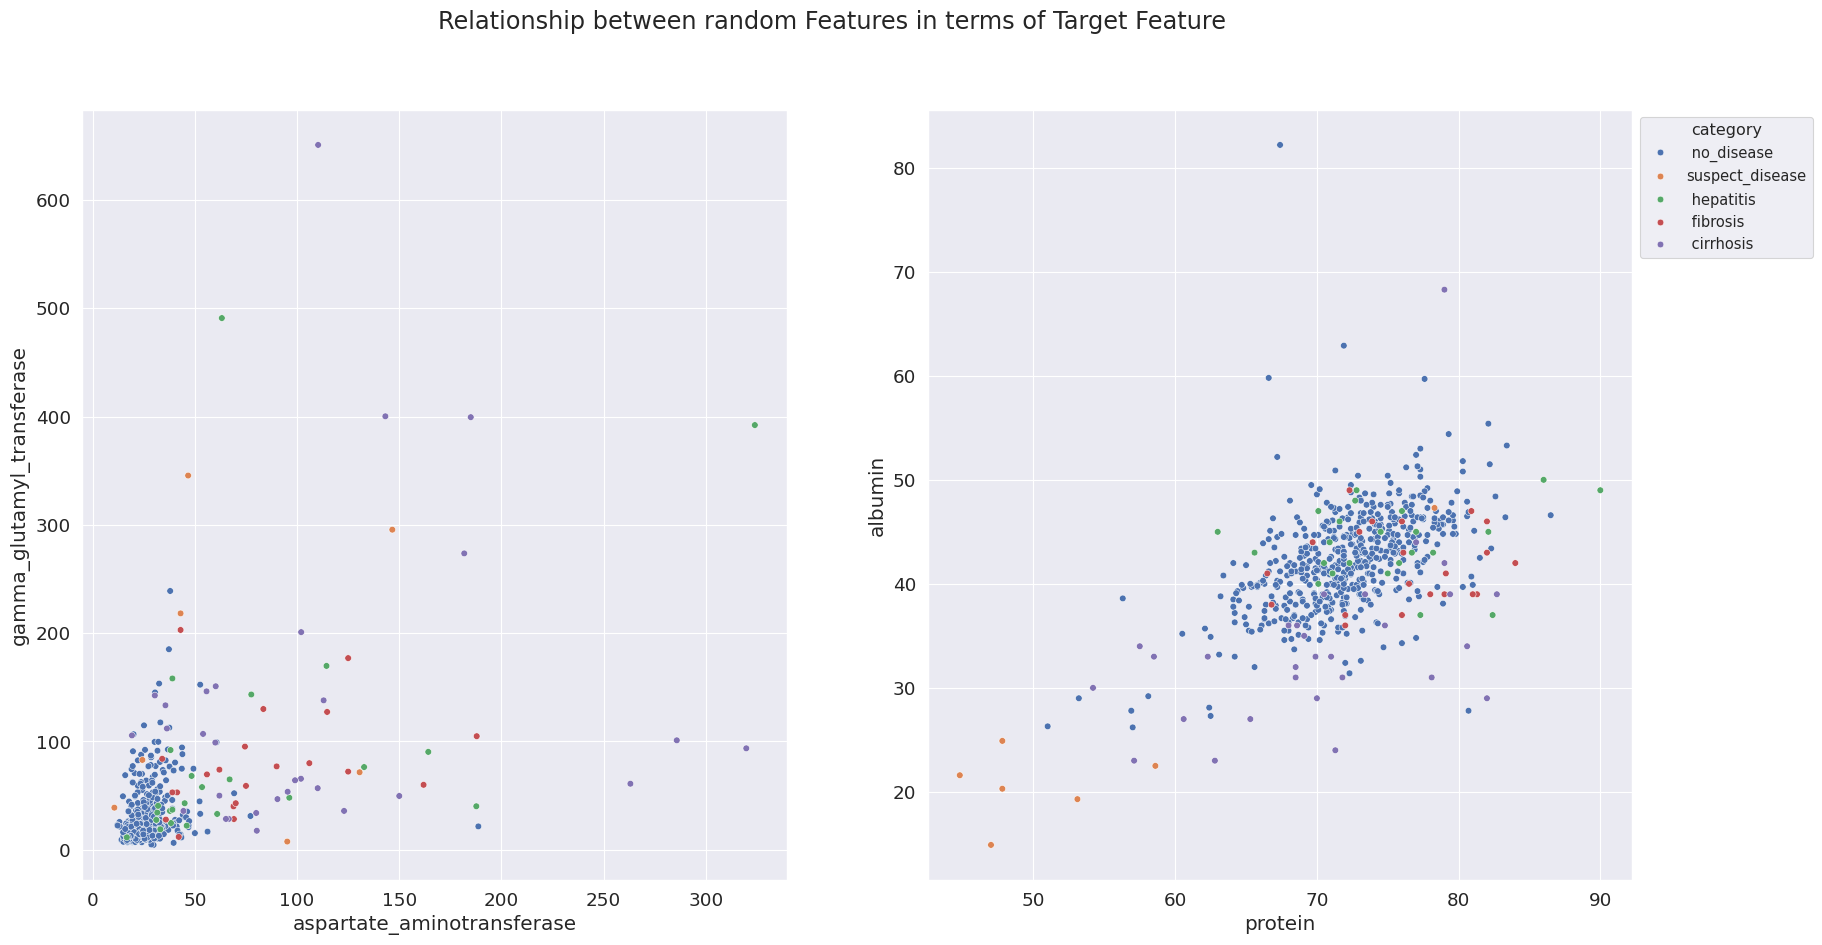

In [35]:
fig, axes = plt.subplots(figsize=[20,10], nrows=1, ncols=2)
fig.suptitle('Relationship between random Features in terms of Target Feature')
sns.set_theme(context='paper', font_scale=1.2)
scatter1 = sns.scatterplot(data=hcv_df, ax=axes[0], x="aspartate_aminotransferase", y="gamma_glutamyl_transferase", hue="category")
scatter1.legend([],[], frameon=False)
scatter2 = sns.scatterplot(data=hcv_df, ax=axes[1], x="protein", y="albumin", hue="category")
sns.move_legend(scatter2, "upper left", bbox_to_anchor=(1, 1))
print(f"Correlation between aspartate_aminotransferase and gamma_glutamyl_transferase is: {hcv_df['aspartate_aminotransferase'].corr(hcv_df['gamma_glutamyl_transferase'])}")

The distribution of category doesn't seem to follow any pattern for random features from scatterplots, so we'll analyze with some other plots too.

**Histograms on raw data**

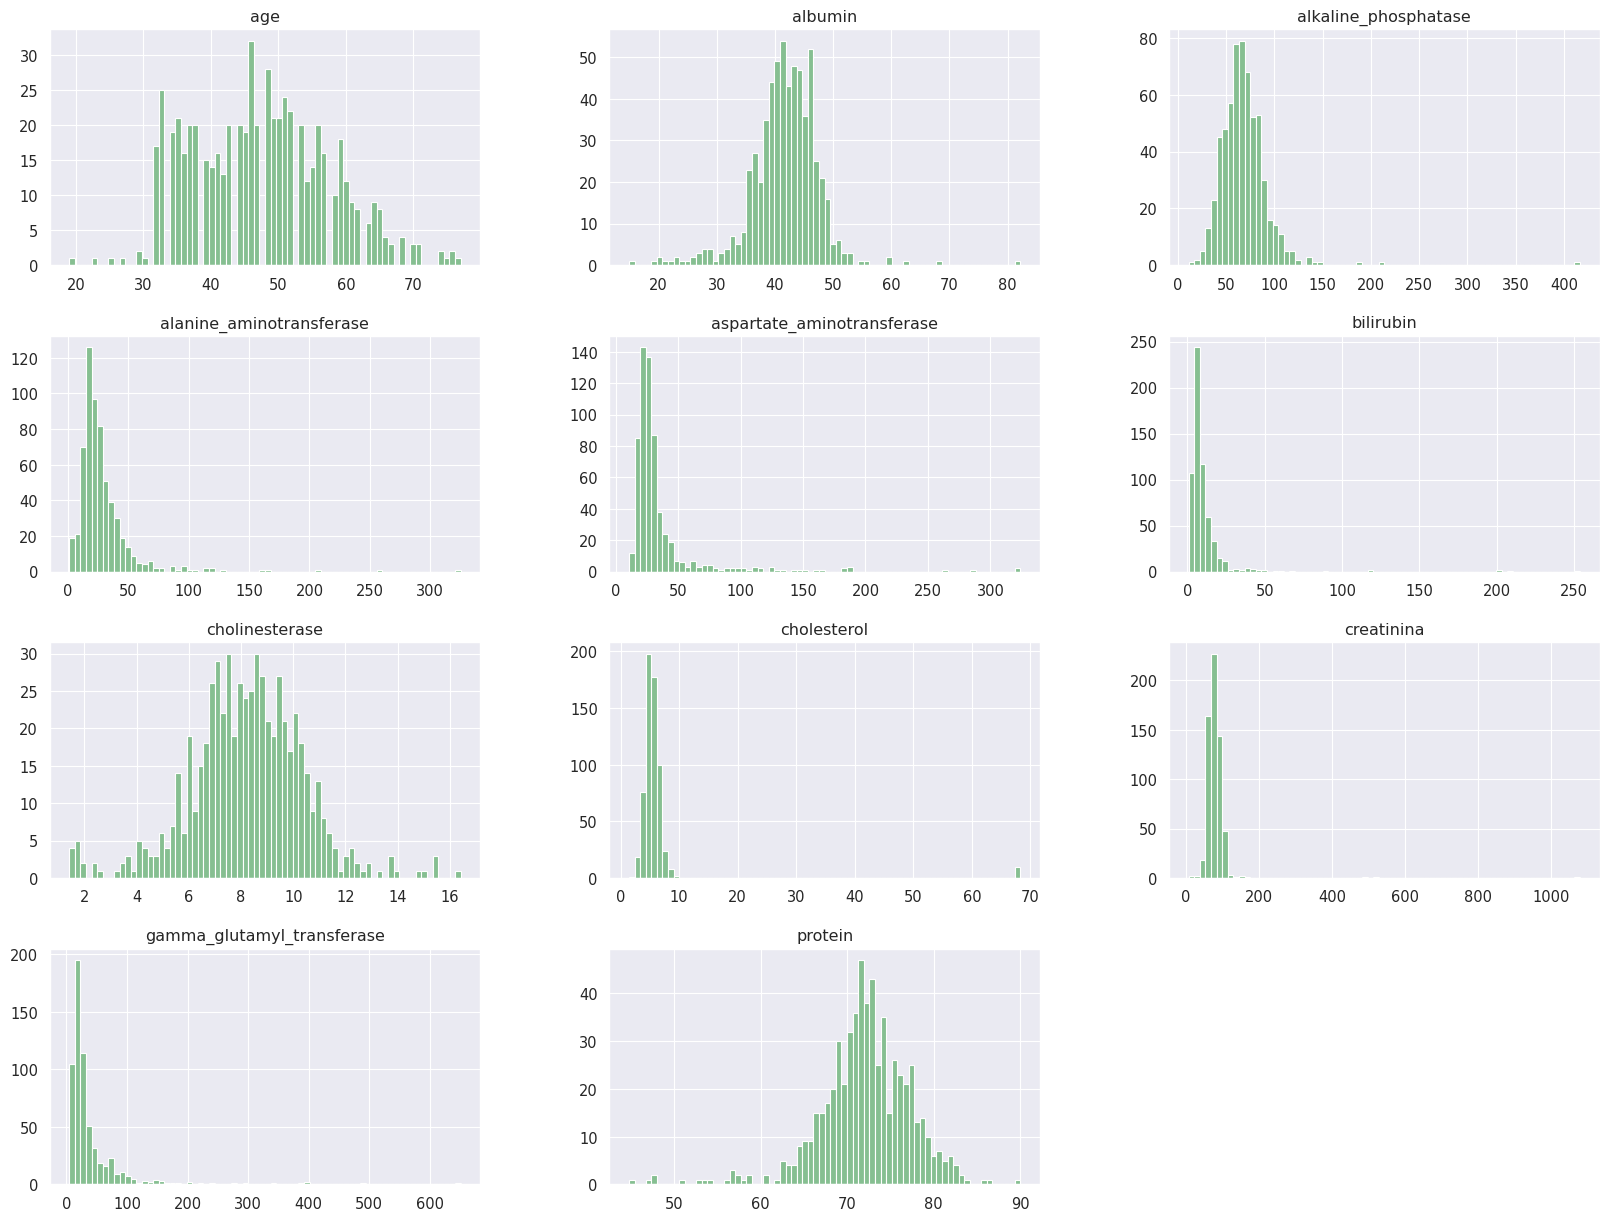

In [36]:
hcv_df.hist(bins=70, figsize=(20,15), color='#86bf91')
plt.show()

Histograms show that most of the variables are right skewed.

In [37]:
hcv_df.describe()

age     albumin  alkaline_phosphatase  alanine_aminotransferase  \
count  615.000000  615.000000            615.000000                615.000000   
mean    47.408130   41.663551             68.283920                 28.515584   
std     10.055105    5.875141             25.643955                 25.499578   
min     19.000000   14.900000             11.300000                  0.900000   
25%     39.000000   38.800000             52.950000                 16.400000   
50%     47.000000   42.000000             66.700000                 23.000000   
75%     54.000000   45.250000             79.300000                 33.100000   
max     77.000000   82.200000            416.600000                325.300000   

       aspartate_aminotransferase   bilirubin  cholinesterase  cholesterol  \
count                  615.000000  615.000000      615.000000   615.000000   
mean                    34.786341   11.396748        8.196634     6.391121   
std                     33.090690   19.673150        2.205657     8.042572   
min                     10.600000    0.800000        1.420000     1.430000   
25%                     21.600000    5.300000        6.935000     4.620000   
50%                     25.900000    7.300000        8.260000     5.310000   
75%                     32.900000   11.200000        9.590000     6.130000   
max                    324.000000  254.000000       16.410000    68.283920   

        creatinina  gamma_glutamyl_transferase     protein  
count   615.000000                  615.000000  614.000000  
mean     81.287805                   39.533171   72.044137  
std      49.756166                   54.661071    5.402636  
min       8.000000                    4.500000   44.800000  
25%      67.000000                   15.700000   69.300000  
50%      77.000000                   23.300000   72.200000  
75%      88.000000                   40.200000   75.400000  
max    1079.100000                  650.900000   90.000000

**Letter Value Plot to visualize Extreme Observations**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'albumin'),
  Text(1, 0, 'alkaline_phosphatase'),
  Text(2, 0, 'alanine_aminotransferase'),
  Text(3, 0, 'aspartate_aminotransferase'),
  Text(4, 0, 'bilirubin'),
  Text(5, 0, 'cholinesterase'),
  Text(6, 0, 'cholesterol'),
  Text(7, 0, 'creatinina'),
  Text(8, 0, 'gamma_glutamyl_transferase'),
  Text(9, 0, 'protein')])

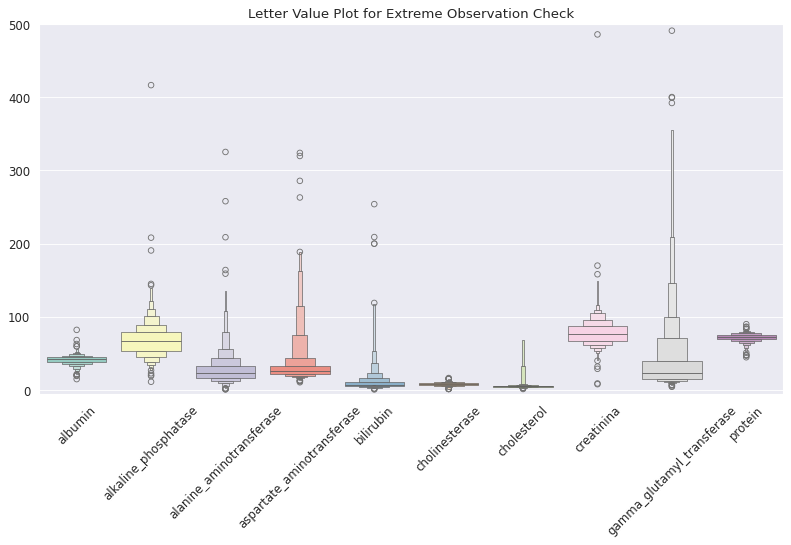

In [38]:
plt.figure(figsize=(12,6),dpi=80)
plt.title("Letter Value Plot for Extreme Observation Check", fontsize=12)
sns.boxenplot(data = hcv_df[hematological_features], palette="Set3")
plt.ylim(-5, 500)
plt.xticks(rotation=45)

**RelPlot**

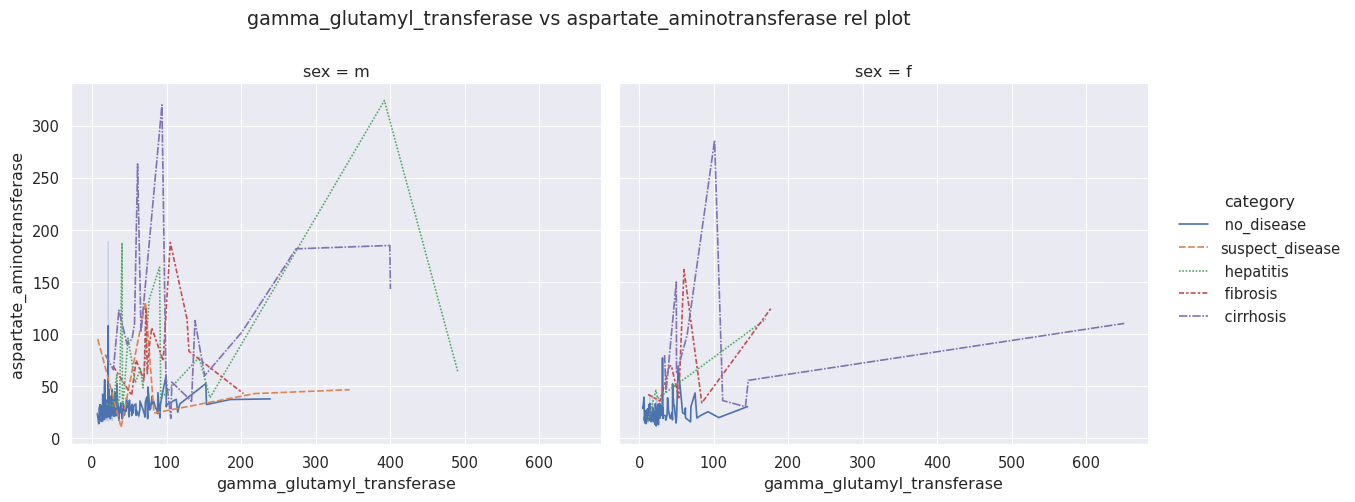

In [39]:
rel = sns.relplot(data=hcv_df, x="gamma_glutamyl_transferase", y="aspartate_aminotransferase", kind="line", col="sex", hue="category", style="category")
rel.fig.suptitle("gamma_glutamyl_transferase vs aspartate_aminotransferase rel plot", y=1)
sns.move_legend(rel, "center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()

From RelPlot we can se the fluctuations values in gamma_glutamyl_transferase vs aspartate_aminotransferase plot, where it seems that a greater value in both gamma_glutamyl_transferase and aspartate_aminotransferase may mean the existence of Liver Disease.

**StripPlot**

<ipython-input-40-4ebde046a283>:12: FutureWarning:

Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.

<ipython-input-40-4ebde046a283>:12: FutureWarning:

Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.

<ipython-input-40-4ebde046a283>:8: FutureWarning:

Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.

<ipython-input-40-4ebde046a283>:12: FutureWarning:

Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.

<ipython-input-40-4ebde046a283>:8: FutureWarning:

Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.

<ipython-input-40-4ebde046a283>:12: FutureWarning:

Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.

<ipython-input-40-4ebde046a283>:8: F

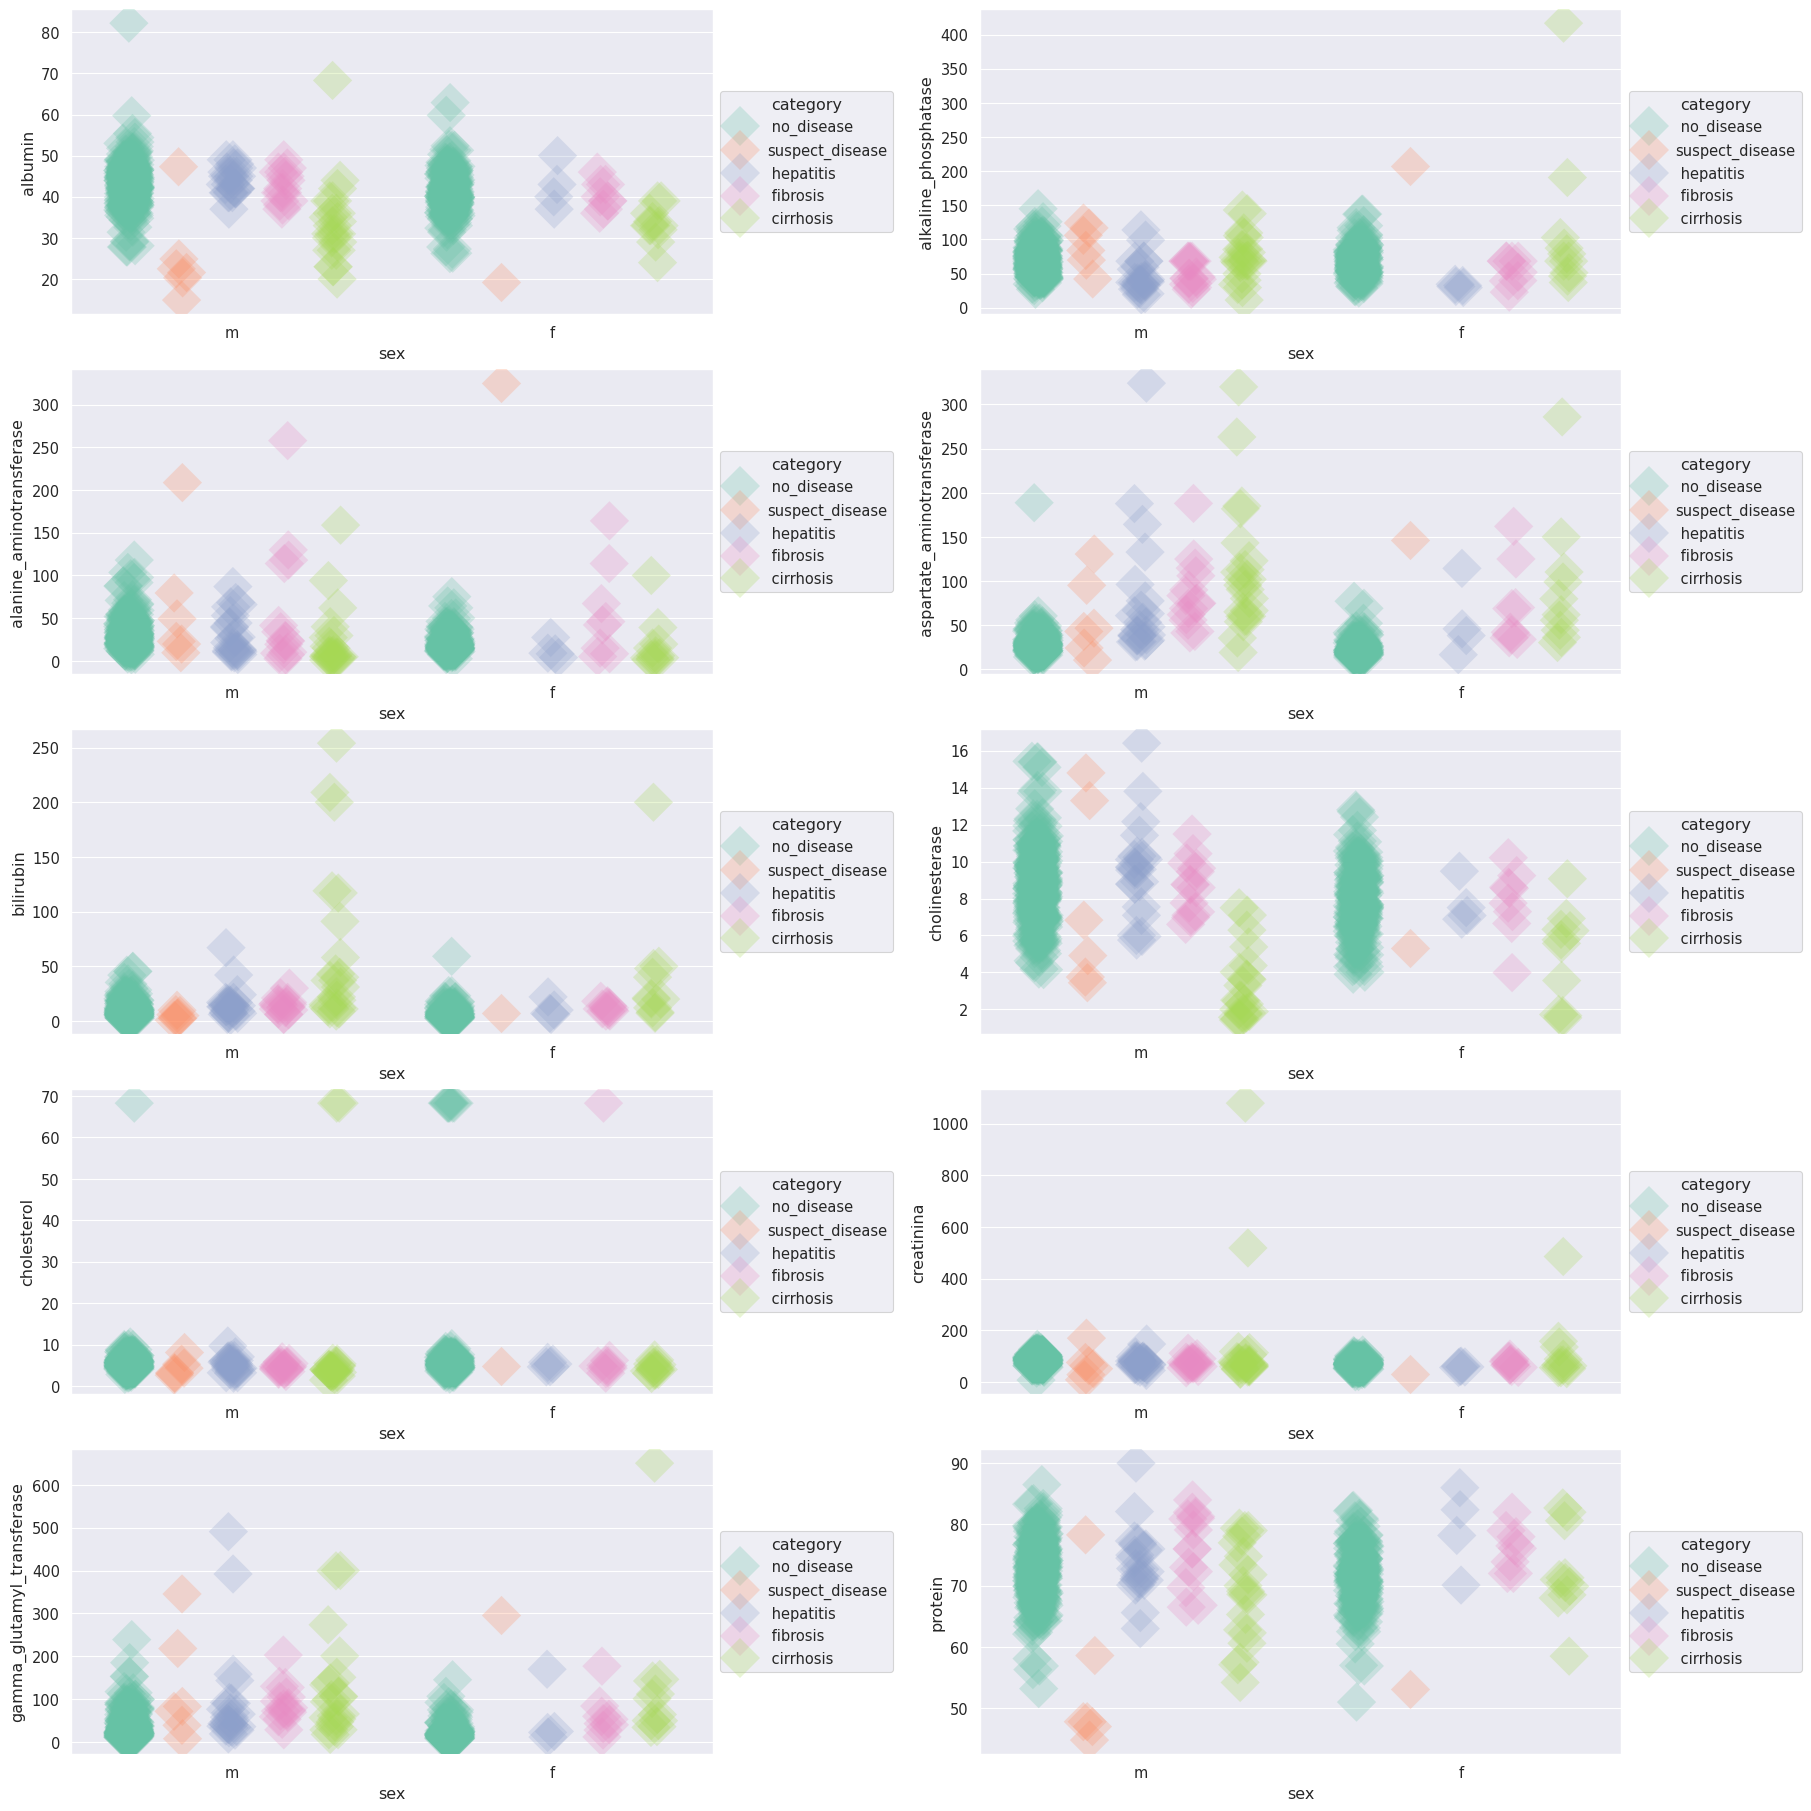

In [40]:
fig, axes = plt.subplots(nrows= 5, ncols= 2, figsize=(18,18), constrained_layout= True)
count_col = 0
count_row = 0
for item in hematological_features:
  if count_col == 2:
    count_col = 0
    count_row += 1
    strip = sns.stripplot(x="sex", y=item, data=hcv_df, hue='category', palette="Set2", dodge=True, size=20, marker="D", edgecolor="gray", alpha=.25, ax= axes[count_row][count_col])
    sns.move_legend(strip, "center left", bbox_to_anchor=(1, 0.5))
    count_col +=1
  else:
    strip = sns.stripplot(x="sex", y=item, data=hcv_df, hue='category', palette="Set2", dodge=True, size=20, marker="D", edgecolor="gray", alpha=.25, ax= axes[count_row][count_col])
    sns.move_legend(strip, "center left", bbox_to_anchor=(1, 0.5))
    count_col +=1

From strip plots we can say that extreme values in features usually results in labeling as a hepatitis patient.

**Changing Categorical values to Numeric values**

In [41]:
hcv_demo=hcv_df.copy()

In [42]:
hcv_two_only_input = hcv_demo.drop('category', axis=1)
hcv_two_only_output = hcv_demo['category']
hcv_two_only_input["sex"].replace({"f": 0, "m": 1}, inplace=True)
hcv_two_only_input = hcv_two_only_input.astype({"sex":int})
hcv_two_only_output.replace({" no_disease": 0, "suspect_disease": 1," hepatitis": 2," fibrosis": 3," cirrhosis": 4}, inplace=True)
hcv_two_only_output = hcv_two_only_output.astype({"category": int})
print(hcv_two_only_input)
print()
hcv_two_only_output

     age  sex  albumin  alkaline_phosphatase  alanine_aminotransferase  \
0     32    1     38.5              52.50000                       7.7   
1     32    1     38.5              70.30000                      18.0   
2     32    1     46.9              74.70000                      36.2   
3     32    1     43.2              52.00000                      30.6   
4     32    1     39.2              74.10000                      32.6   
..   ...  ...      ...                   ...                       ...   
610   62    0     32.0             416.60000                       5.9   
611   64    0     24.0             102.80000                       2.9   
612   64    0     29.0              87.30000                       3.5   
613   46    0     33.0              68.28392                      39.0   
614   59    0     36.0              68.28392                     100.0   

     aspartate_aminotransferase  bilirubin  cholinesterase  cholesterol  \
0                          22.1     

0      0
1      0
2      0
3      0
4      0
      ..
610    4
611    4
612    4
613    4
614    4
Name: category, Length: 615, dtype: int64

In [43]:
hcv_two_only_output.value_counts()

0    533
4     30
2     24
3     21
1      7
Name: category, dtype: int64

In [44]:
hcv_two_only_input.describe()

age         sex     albumin  alkaline_phosphatase  \
count  615.000000  615.000000  615.000000            615.000000   
mean    47.408130    0.613008   41.663551             68.283920   
std     10.055105    0.487458    5.875141             25.643955   
min     19.000000    0.000000   14.900000             11.300000   
25%     39.000000    0.000000   38.800000             52.950000   
50%     47.000000    1.000000   42.000000             66.700000   
75%     54.000000    1.000000   45.250000             79.300000   
max     77.000000    1.000000   82.200000            416.600000   

       alanine_aminotransferase  aspartate_aminotransferase   bilirubin  \
count                615.000000                  615.000000  615.000000   
mean                  28.515584                   34.786341   11.396748   
std                   25.499578                   33.090690   19.673150   
min                    0.900000                   10.600000    0.800000   
25%                   16.400000                   21.600000    5.300000   
50%                   23.000000                   25.900000    7.300000   
75%                   33.100000                   32.900000   11.200000   
max                  325.300000                  324.000000  254.000000   

       cholinesterase  cholesterol   creatinina  gamma_glutamyl_transferase  \
count      615.000000   615.000000   615.000000                  615.000000   
mean         8.196634     6.391121    81.287805                   39.533171   
std          2.205657     8.042572    49.756166                   54.661071   
min          1.420000     1.430000     8.000000                    4.500000   
25%          6.935000     4.620000    67.000000                   15.700000   
50%          8.260000     5.310000    77.000000                   23.300000   
75%          9.590000     6.130000    88.000000                   40.200000   
max         16.410000    68.283920  1079.100000                  650.900000   

          protein  
count  614.000000  
mean    72.044137  
std      5.402636  
min     44.800000  
25%     69.300000  
50%     72.200000  
75%     75.400000  
max     90.000000

#**Pre Processing**

**Imputation for handling of missing values(Iterative Imputer-MICE and MissForest)**

In [45]:
from sklearn.linear_model import LinearRegression
def miceImpute(df_data_only_input, **kwargs):
    lr = LinearRegression()
    imp = IterativeImputer(estimator=lr, **kwargs)
    xtrans = imp.fit_transform(df_data_only_input)
    xtrans = pd.DataFrame(xtrans, columns=df_data_only_input.columns)
    return xtrans

In [46]:
mice_input = miceImpute(hcv_two_only_input, verbose=2, initial_strategy='mean', random_state=42, max_iter=20, tol=1e-10)

[IterativeImputer] Completing matrix with shape (615, 12)
[IterativeImputer] Ending imputation round 1/20, elapsed time 0.05
[IterativeImputer] Change: 8.701077807245952, scaled tolerance: 1.0790999999999999e-07 
[IterativeImputer] Ending imputation round 2/20, elapsed time 0.09
[IterativeImputer] Change: 0.0, scaled tolerance: 1.0790999999999999e-07 
[IterativeImputer] Early stopping criterion reached.


In [ ]:
!apt-get install build-essential python3-dev


In [48]:
#!pip install missingpy==0.2.0 scikit-learn==0.24.2
#!pip install impyute

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 18.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... canceled
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-p

In [49]:
import pandas as pd
from impyute.imputation.cs import mice

def missForestImpute(df_data_only_input, **kwargs):
    # Assuming df_data_only_input is a DataFrame
    X_missForest = mice(df_data_only_input.values, **kwargs)
    X_missForest = pd.DataFrame(X_missForest, columns=df_data_only_input.columns)
    print(X_missForest)
    return X_missForest

# Example usage
# missForest_input = missForestImpute(hcv_two_only_input, verbose=2, max_iter=20, tol=1e-10)


In [50]:
missForest_input = missForestImpute(hcv_two_only_input, criterion='squared_error', random_state=42, n_estimators=200, verbose=0)

      age  sex  albumin  alkaline_phosphatase  alanine_aminotransferase  \
0    32.0  1.0     38.5              52.50000                       7.7   
1    32.0  1.0     38.5              70.30000                      18.0   
2    32.0  1.0     46.9              74.70000                      36.2   
3    32.0  1.0     43.2              52.00000                      30.6   
4    32.0  1.0     39.2              74.10000                      32.6   
..    ...  ...      ...                   ...                       ...   
610  62.0  0.0     32.0             416.60000                       5.9   
611  64.0  0.0     24.0             102.80000                       2.9   
612  64.0  0.0     29.0              87.30000                       3.5   
613  46.0  0.0     33.0              68.28392                      39.0   
614  59.0  0.0     36.0              68.28392                     100.0   

     aspartate_aminotransferase  bilirubin  cholinesterase  cholesterol  \
0                       

In [51]:
mice_imputed_df = pd.concat([mice_input, hcv_two_only_output], axis=1)

mice_imputed_df.head()

age  sex  albumin  alkaline_phosphatase  alanine_aminotransferase  \
0  32.0  1.0     38.5                  52.5                       7.7   
1  32.0  1.0     38.5                  70.3                      18.0   
2  32.0  1.0     46.9                  74.7                      36.2   
3  32.0  1.0     43.2                  52.0                      30.6   
4  32.0  1.0     39.2                  74.1                      32.6   

   aspartate_aminotransferase  bilirubin  cholinesterase  cholesterol  \
0                        22.1        7.5            6.93         3.23   
1                        24.7        3.9           11.17         4.80   
2                        52.6        6.1            8.84         5.20   
3                        22.6       18.9            7.33         4.74   
4                        24.8        9.6            9.15         4.32   

   creatinina  gamma_glutamyl_transferase  protein  category  
0       106.0                        12.1     69.0         0  
1        74.0                        15.6     76.5         0  
2        86.0                        33.2     79.3         0  
3        80.0                        33.8     75.7         0  
4        76.0                        29.9     68.7         0

In [52]:
mice_imputed_df.isnull().sum()

age                           0
sex                           0
albumin                       0
alkaline_phosphatase          0
alanine_aminotransferase      0
aspartate_aminotransferase    0
bilirubin                     0
cholinesterase                0
cholesterol                   0
creatinina                    0
gamma_glutamyl_transferase    0
protein                       0
category                      0
dtype: int64

In [53]:
missForest_imputed_df = pd.concat([missForest_input, hcv_two_only_output], axis=1)

missForest_imputed_df.head()

age  sex  albumin  alkaline_phosphatase  alanine_aminotransferase  \
0  32.0  1.0     38.5                  52.5                       7.7   
1  32.0  1.0     38.5                  70.3                      18.0   
2  32.0  1.0     46.9                  74.7                      36.2   
3  32.0  1.0     43.2                  52.0                      30.6   
4  32.0  1.0     39.2                  74.1                      32.6   

   aspartate_aminotransferase  bilirubin  cholinesterase  cholesterol  \
0                        22.1        7.5            6.93         3.23   
1                        24.7        3.9           11.17         4.80   
2                        52.6        6.1            8.84         5.20   
3                        22.6       18.9            7.33         4.74   
4                        24.8        9.6            9.15         4.32   

   creatinina  gamma_glutamyl_transferase  protein  category  
0       106.0                        12.1     69.0         0  
1        74.0                        15.6     76.5         0  
2        86.0                        33.2     79.3         0  
3        80.0                        33.8     75.7         0  
4        76.0                        29.9     68.7         0

In [54]:
missForest_imputed_df.isnull().sum()

age                           0
sex                           0
albumin                       0
alkaline_phosphatase          0
alanine_aminotransferase      0
aspartate_aminotransferase    0
bilirubin                     0
cholinesterase                0
cholesterol                   0
creatinina                    0
gamma_glutamyl_transferase    0
protein                       0
category                      0
dtype: int64

In [55]:
print("Columns in missForest_imputed_df:", missForest_imputed_df.columns)


Columns in missForest_imputed_df: Index(['age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase', 'protein', 'category'],
      dtype='object')


In [56]:
basic_statistical_info_comparison = pd.DataFrame({'Variables':missForest_imputed_df.drop(['sex', 'category'], axis=1).mean().index,
                                                 'Raw_DF_Mean':hcv_demo.drop(['sex', 'category'], axis=1).mean().values,
                                                 'MICE_Imputed_DF_Mean':mice_imputed_df.drop(['sex', 'category'], axis=1).mean().values,
                                                 'MissForest_Imputed_DF_Mean':missForest_imputed_df.drop(['sex', 'category'], axis=1).mean().values,
                                                 'Raw_DF_STD':hcv_demo.drop(['sex', 'category'], axis=1).std().values,
                                                 'MICE_Imputed_DF_STD':mice_imputed_df.drop(['sex', 'category'], axis=1).std().values,
                                                 'MissForest_Imputed_DF_STD':missForest_imputed_df.drop(['sex', 'category'], axis=1).std().values})



In [57]:
basic_statistical_info_comparison

Variables  Raw_DF_Mean  MICE_Imputed_DF_Mean  \
0                          age    47.408130             47.408130   
1                      albumin    41.663551             41.663551   
2         alkaline_phosphatase    68.283920             68.283920   
3     alanine_aminotransferase    28.515584             28.515584   
4   aspartate_aminotransferase    34.786341             34.786341   
5                    bilirubin    11.396748             11.396748   
6               cholinesterase     8.196634              8.196634   
7                  cholesterol     6.391121              6.391121   
8                   creatinina    81.287805             81.287805   
9   gamma_glutamyl_transferase    39.533171             39.533171   
10                     protein    72.044137             72.029989   

    MissForest_Imputed_DF_Mean  Raw_DF_STD  MICE_Imputed_DF_STD  \
0                    47.408130   10.055105            10.055105   
1                    41.663551    5.875141             5.875141   
2                    68.283920   25.643955            25.643955   
3                    28.515584   25.499578            25.499578   
4                    34.786341   33.090690            33.090690   
5                    11.396748   19.673150            19.673150   
6                     8.196634    2.205657             2.205657   
7                     6.391121    8.042572             8.042572   
8                    81.287805   49.756166            49.756166   
9                    39.533171   54.661071            54.661071   
10                   72.029989    5.402636             5.409625   

    MissForest_Imputed_DF_STD  
0                   10.055105  
1                    5.875141  
2                   25.643955  
3                   25.499578  
4                   33.090690  
5                   19.673150  
6                    2.205657  
7                    8.042572  
8                   49.756166  
9                   54.661071  
10                   5.409625

#**Visualization After Pre Processing**

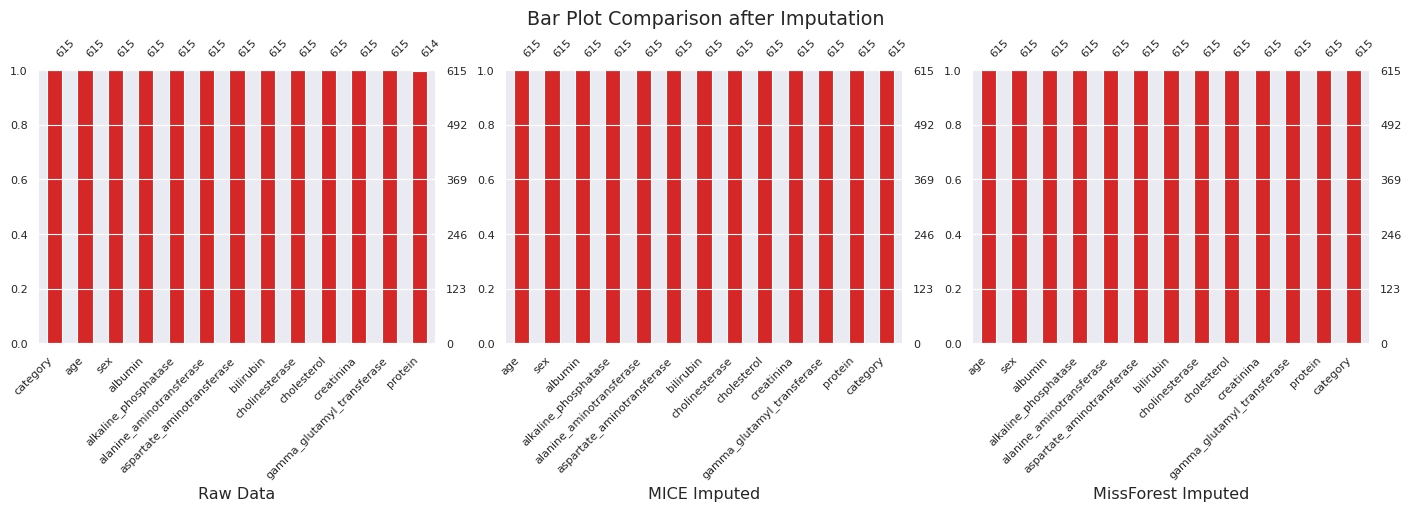

In [58]:
fig, axes = plt.subplots(figsize=[14,5], nrows=1, ncols=3, constrained_layout=True)
fig.suptitle("Bar Plot Comparison after Imputation")
missing_bar_plot_raw = msno.bar(hcv_df, ax=axes[0], color="tab:red", fontsize = 8)
missing_bar_plot_mice = msno.bar(mice_imputed_df, ax=axes[1], color="tab:red", fontsize = 8)
missing_bar_plot_missforest = msno.bar(missForest_imputed_df, ax=axes[2], color="tab:red", fontsize = 8)
missing_bar_plot_raw.set_xlabel('Raw Data')
missing_bar_plot_mice.set_xlabel('MICE Imputed')
missing_bar_plot_missforest.set_xlabel('MissForest Imputed')
plt.show()

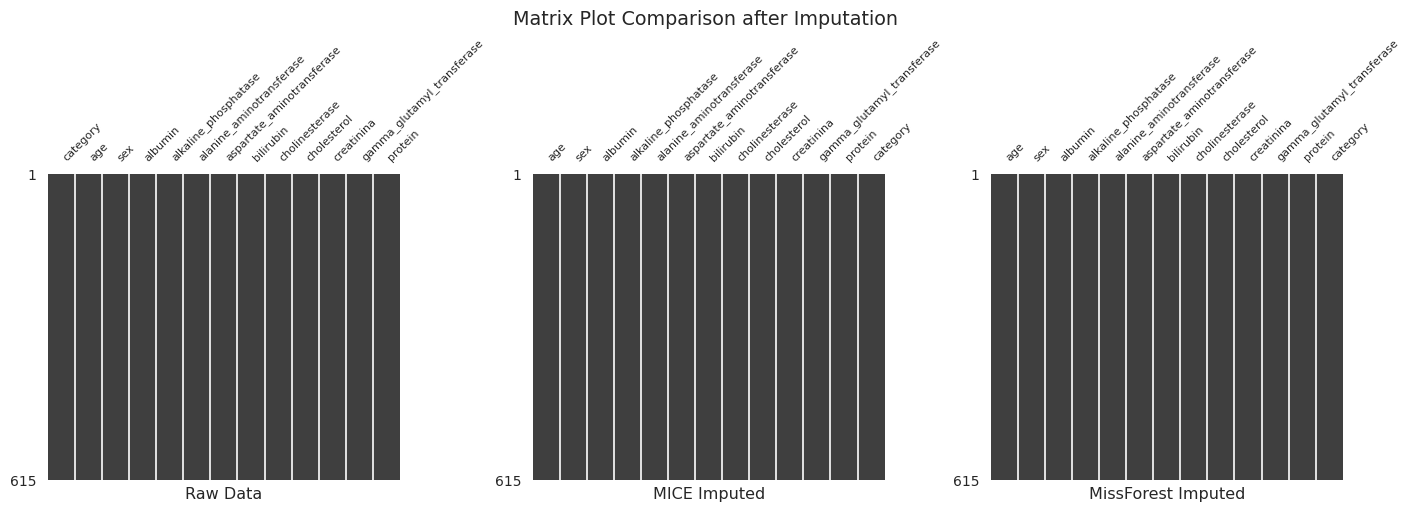

In [59]:
fig, axes = plt.subplots(figsize=[14,5], nrows=1, ncols=3, constrained_layout=True)
fig.suptitle("Matrix Plot Comparison after Imputation")
missing_matrix_plot_raw = msno.matrix(hcv_df, ax=axes[0], sparkline=False, fontsize = 8)
missing_matrix_plot_mice = msno.matrix(mice_imputed_df, ax=axes[1], sparkline=False, fontsize = 8)
missing_matrix_plot_missforest = msno.matrix(missForest_imputed_df, ax=axes[2], sparkline=False, fontsize = 8)
missing_matrix_plot_raw.set_xlabel('Raw Data')
missing_matrix_plot_mice.set_xlabel('MICE Imputed')
missing_matrix_plot_missforest.set_xlabel('MissForest Imputed')
plt.show()

**Scatter Plot**

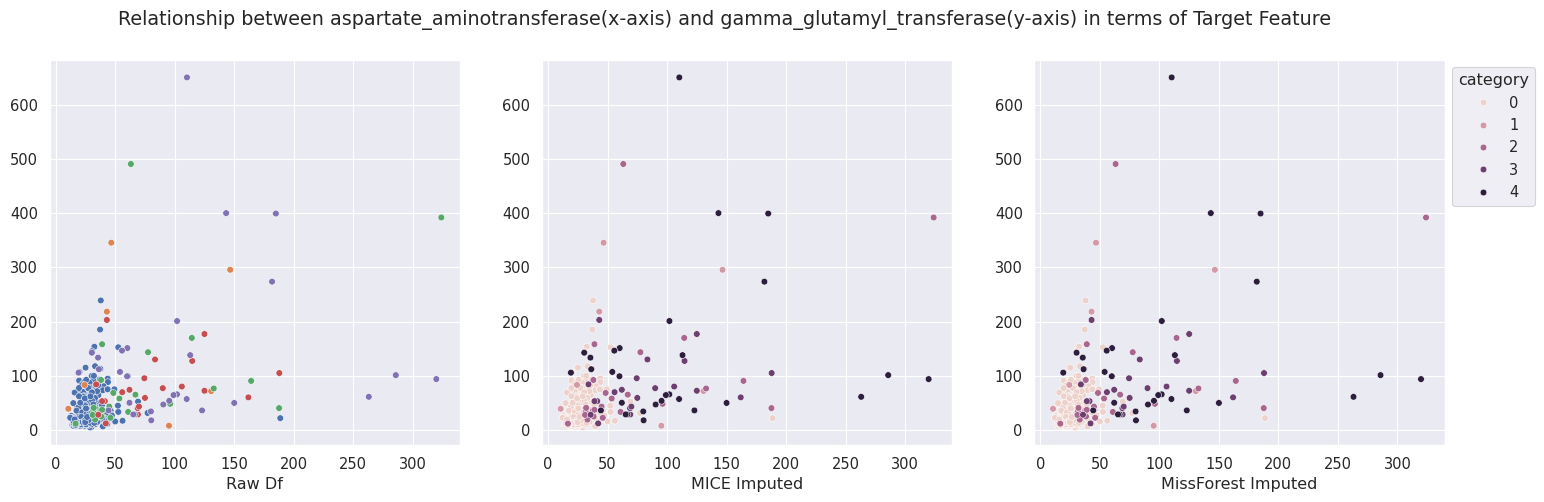

In [60]:
#Watching Scatter plot to see variability between random fachuki
fig, axes = plt.subplots(figsize=[18,5], nrows=1, ncols=3)
fig.suptitle('Relationship between aspartate_aminotransferase(x-axis) and gamma_glutamyl_transferase(y-axis) in terms of Target Feature')
sns.set_theme(context='paper', font_scale=1.2)
scatter_raw1 = sns.scatterplot(data=hcv_df, ax=axes[0], x="aspartate_aminotransferase", y="gamma_glutamyl_transferase", hue="category")
scatter_raw1.legend([],[], frameon=False)
scatter_raw1.set_xlabel('Raw Df')
scatter_raw1.set_ylabel('')
scattermice = sns.scatterplot(data=mice_imputed_df, ax=axes[1], x="aspartate_aminotransferase", y="gamma_glutamyl_transferase", hue="category")
scattermice.legend([],[], frameon=False)
scattermice.set_xlabel('MICE Imputed')
scattermice.set_ylabel('')
scattermissforest = sns.scatterplot(data=missForest_imputed_df, ax=axes[2], x="aspartate_aminotransferase", y="gamma_glutamyl_transferase", hue="category")
scattermissforest.set_xlabel('MissForest Imputed')
scattermissforest.set_ylabel('')
# plt.legend(['hola', 'pola'])
sns.move_legend(scattermissforest, "upper left", bbox_to_anchor=(1, 1))

We can see that after imputation, there are no draspartate_aminotransferaseic change in distribution in both MICE and MissForest Imputed datasets.

**Boxplot**

In [61]:
boxplot_missForest=missForest_input.copy()
boxplot_mice=mice_input.copy()

In [62]:
boxplot_missForest=boxplot_missForest.drop('sex', axis=1)
boxplot_mice=boxplot_mice.drop('sex', axis=1)

(-5.0, 500.0)

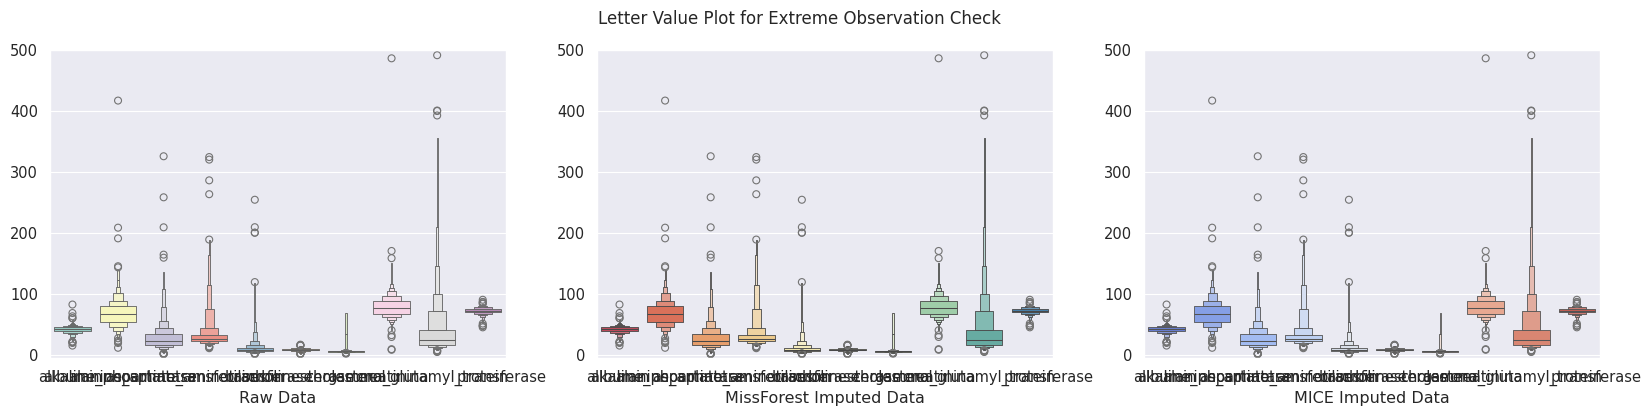

In [63]:
fig, axes = plt.subplots(figsize=(20,4), nrows=1, ncols=3)

fig.suptitle("Letter Value Plot for Extreme Observation Check", fontsize=12)

boxen_raw = sns.boxenplot(data = hcv_df[hematological_features], palette="Set3", ax=axes[0])

boxen_missforest = sns.boxenplot(data = boxplot_missForest[hematological_features], palette="Spectral",  ax=axes[1])

boxen_mice = sns.boxenplot(data = boxplot_mice[hematological_features], palette="coolwarm",  ax=axes[2])

boxen_raw.set_xlabel('Raw Data')

boxen_missforest.set_xlabel('MissForest Imputed Data')

boxen_mice.set_xlabel('MICE Imputed Data')

boxen_raw.set_ylim(-5, 500)

boxen_missforest.set_ylim(-5, 500)

boxen_mice.set_ylim(-5, 500)

We can see there are no difference in extreme value observations after imputation. There are similar number of extreme observations. The reason for these extreme observations can be manual mistakes or machine mistakes.

In [64]:
hcv_two_only_output.value_counts()

0    533
4     30
2     24
3     21
1      7
Name: category, dtype: int64

#**Statistics**

**Descriptives**

In [65]:
skewness = hcv_demo.drop(['sex','category'], axis=1).skew()
kurtosis = hcv_demo.drop(['sex','category'], axis=1).kurtosis()
skew_kurt_df = pd.DataFrame({'Variables':skewness.index, 'skewness':skewness.values, 'kurtosis':kurtosis.values})
skew_kurt_df

Variables   skewness    kurtosis
0                          age   0.267134   -0.386473
1                      albumin  -0.037569    6.102800
2         alkaline_phosphatase   4.724225   56.707040
3     alanine_aminotransferase   5.476393   46.766263
4   aspartate_aminotransferase   4.940327   30.836641
5                    bilirubin   8.385437   83.186732
6               cholinesterase  -0.110233    1.314730
7                  cholesterol   7.438535   54.672483
8                   creatinina  15.169291  280.100237
9   gamma_glutamyl_transferase   5.632734   43.712579
10                     protein  -0.963687    3.544529

Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. We can see there are a lot of right skewed variables in the data.<br>We also notice that many variables have a really high kurtosis value, indicating that there might be outliers.

In [66]:
df_raw = hcv_demo.copy()
df_raw = df_raw.dropna()
df_raw.head()

category  age sex  albumin  alkaline_phosphatase  alanine_aminotransferase  \
0         0   32   m     38.5                  52.5                       7.7   
1         0   32   m     38.5                  70.3                      18.0   
2         0   32   m     46.9                  74.7                      36.2   
3         0   32   m     43.2                  52.0                      30.6   
4         0   32   m     39.2                  74.1                      32.6   

   aspartate_aminotransferase  bilirubin  cholinesterase  cholesterol  \
0                        22.1        7.5            6.93         3.23   
1                        24.7        3.9           11.17         4.80   
2                        52.6        6.1            8.84         5.20   
3                        22.6       18.9            7.33         4.74   
4                        24.8        9.6            9.15         4.32   

   creatinina  gamma_glutamyl_transferase  protein  
0       106.0                        12.1     69.0  
1        74.0                        15.6     76.5  
2        86.0                        33.2     79.3  
3        80.0                        33.8     75.7  
4        76.0                        29.9     68.7

In [67]:
df_raw = df_raw.drop(['age', 'sex'], axis=1)

In [68]:
import pylab

def probability_plot(df,feature):
    print(f'{feature}')
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)  #1st plot
    plt.title(feature)
    df[feature].hist()
    plt.subplot(1,2,2)  #2nd plot
    stats.probplot(df[feature], dist='norm', plot= pylab )
    plt.tight_layout
    plt.show()

albumin


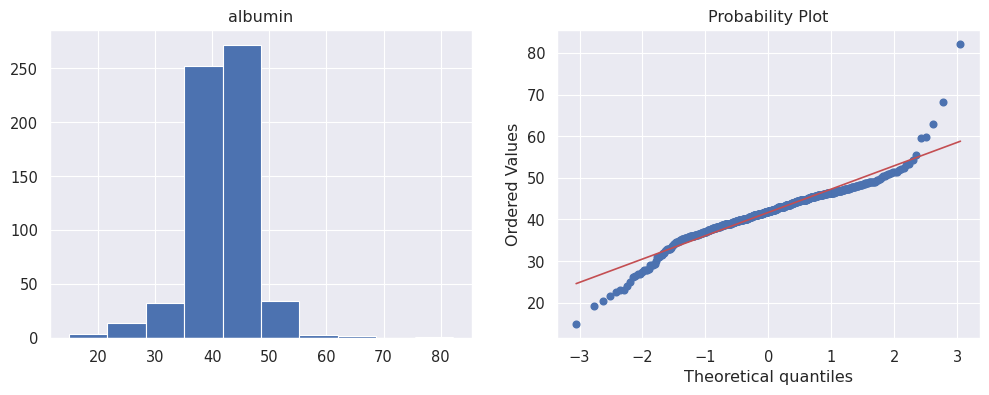

alkaline_phosphatase


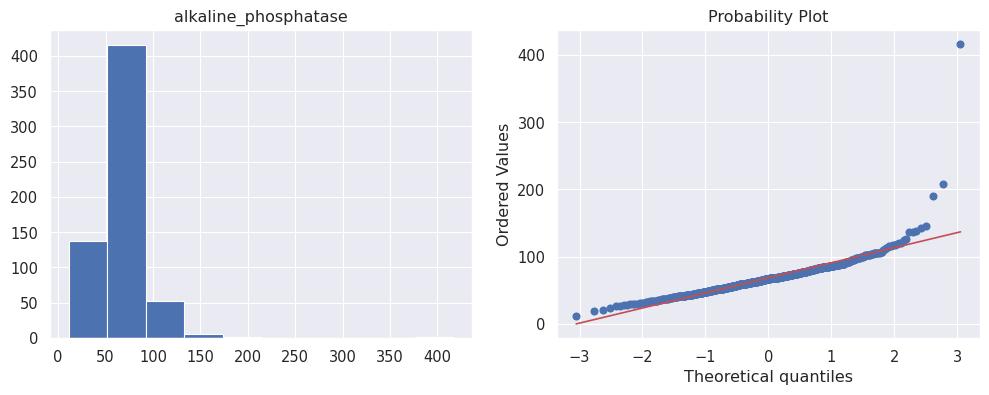

alanine_aminotransferase


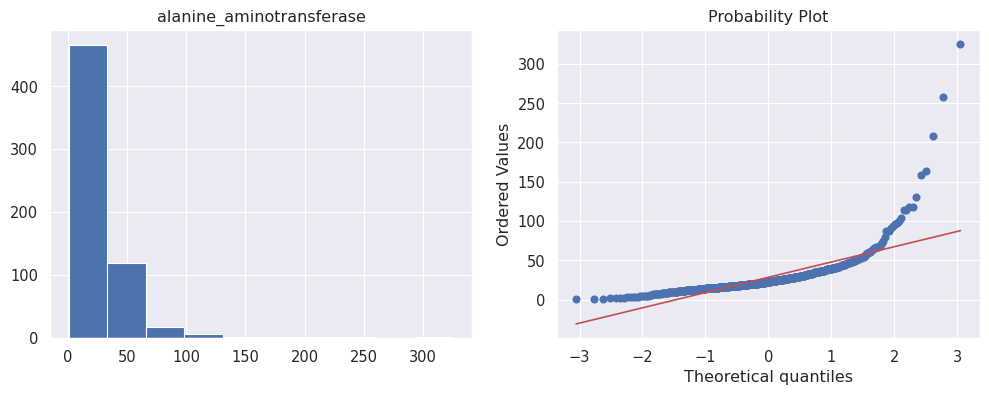

aspartate_aminotransferase


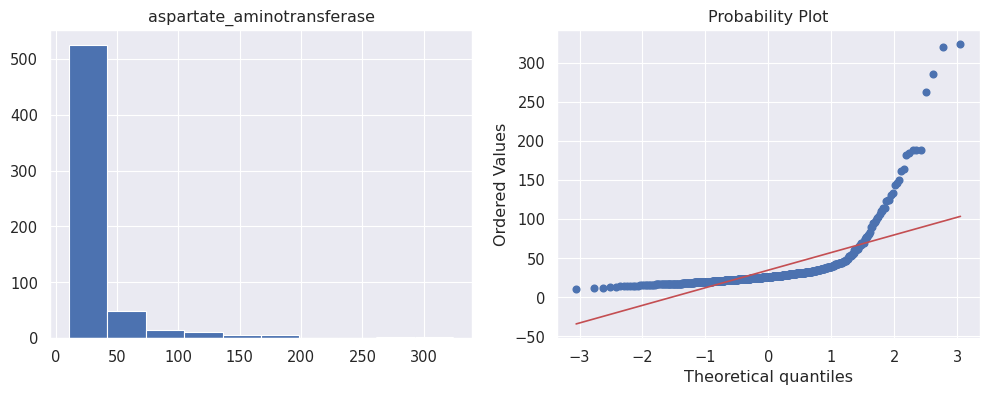

bilirubin


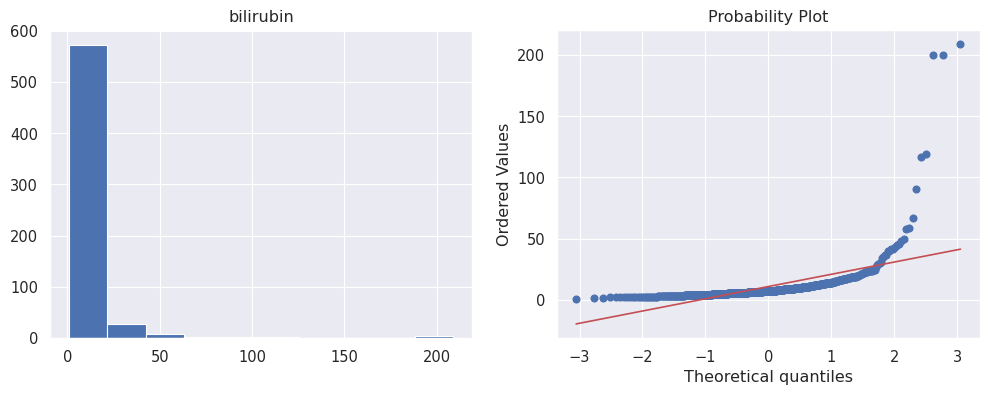

cholinesterase


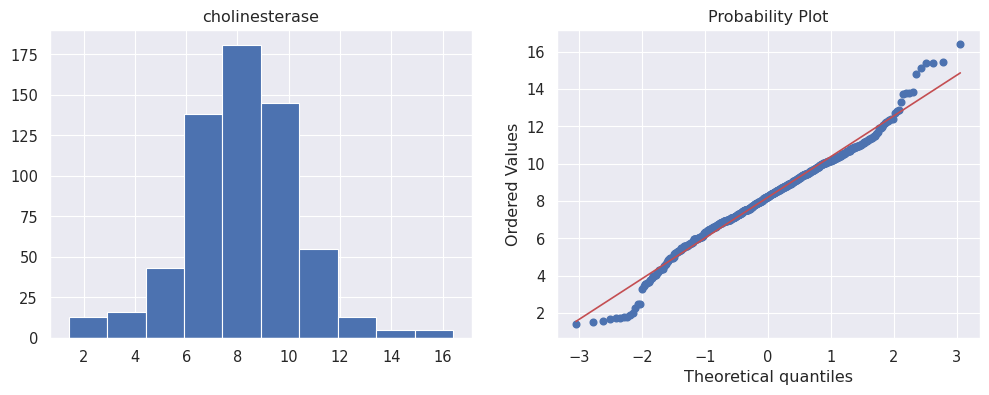

cholesterol


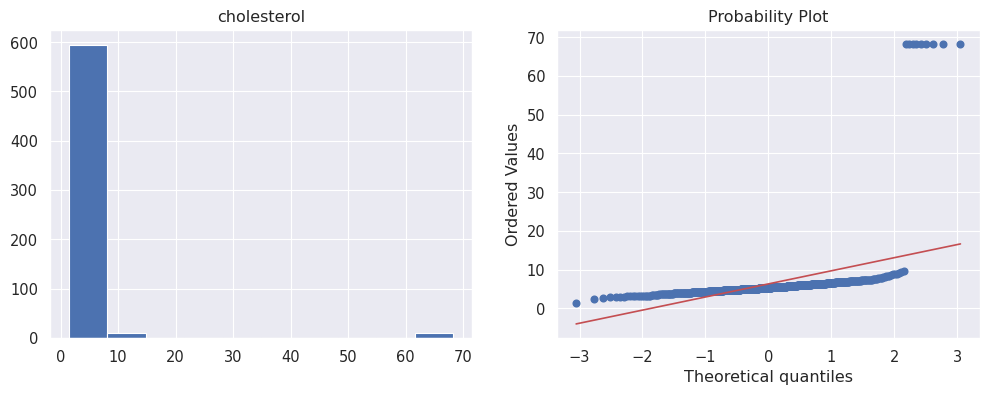

creatinina


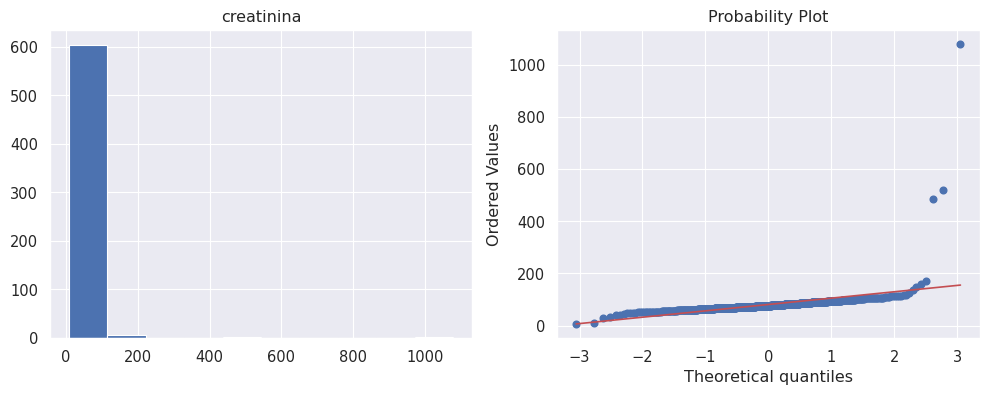

gamma_glutamyl_transferase


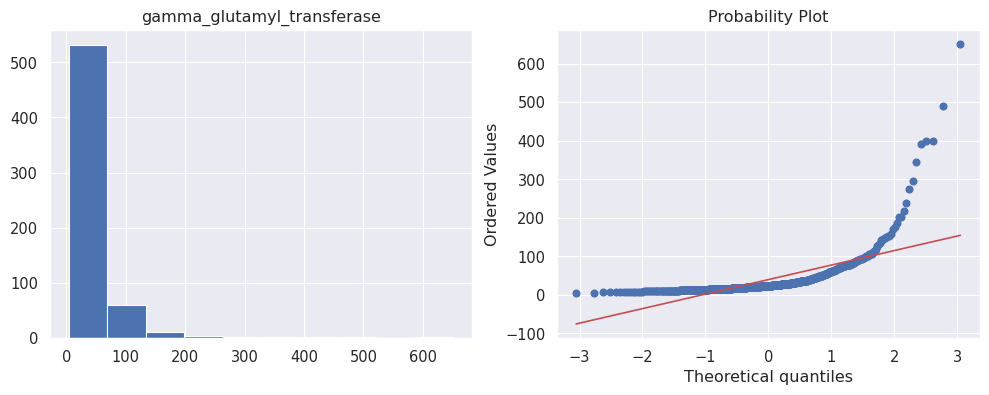

protein


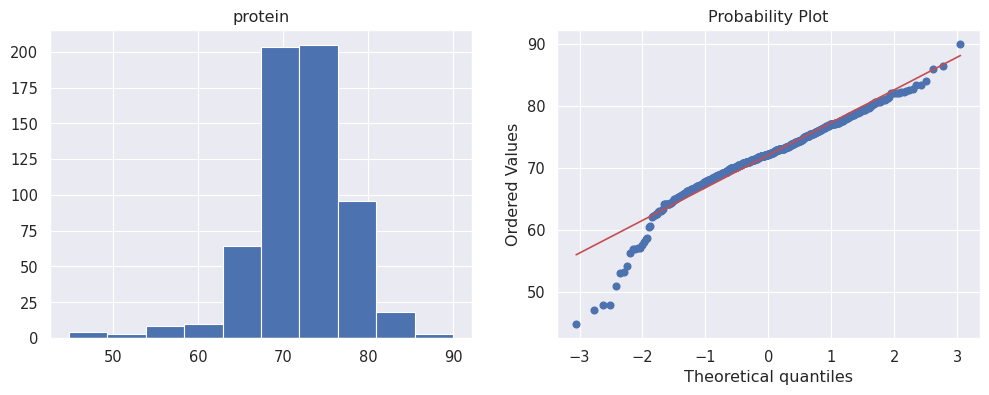

In [69]:
for item in hematological_features:
  probability_plot(df_raw,item)

We can see from Q-Q plot that most of the variables do not seem to follow a normal distribution and some of them have extreme values.

In [70]:
df_raw['aspartate_aminotransferase'],parameters_raw1 = stats.boxcox(df_raw['aspartate_aminotransferase'])
df_raw['albumin'],parameters_raw2 = stats.boxcox(df_raw['albumin'])
df_raw['alkaline_phosphatase'],parameters_raw3 = stats.boxcox(df_raw['alkaline_phosphatase'])
df_raw['alanine_aminotransferase'],parameters_raw4 = stats.boxcox(df_raw['alanine_aminotransferase'])
df_raw['bilirubin'],parameters_raw5 = stats.boxcox(df_raw['bilirubin'])
df_raw['cholinesterase'],parameters_raw6 = stats.boxcox(df_raw['cholinesterase'])
df_raw['cholesterol'],parameters_raw7 = stats.boxcox(df_raw['cholesterol'])
df_raw['creatinina'],parameters_raw8 = stats.boxcox(df_raw['creatinina'])
df_raw['gamma_glutamyl_transferase'],parameters_raw9 = stats.boxcox(df_raw['gamma_glutamyl_transferase'])
df_raw['protein'],parameters_raw10 = stats.boxcox(df_raw['protein'])

albumin


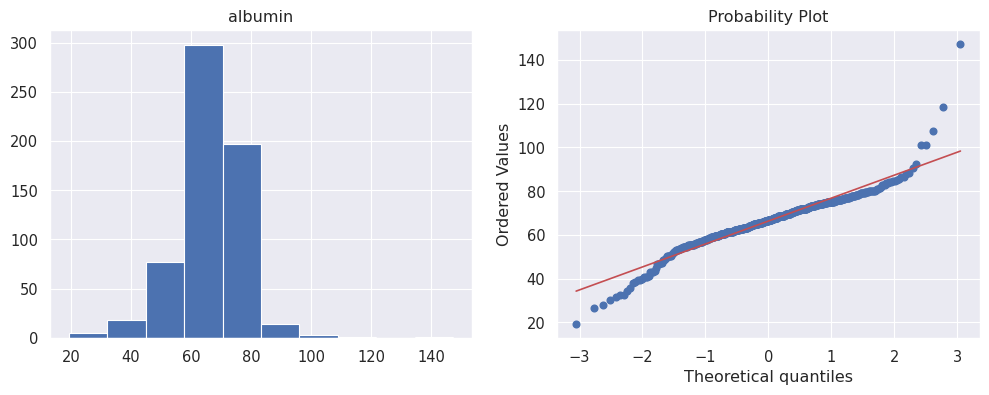

alkaline_phosphatase


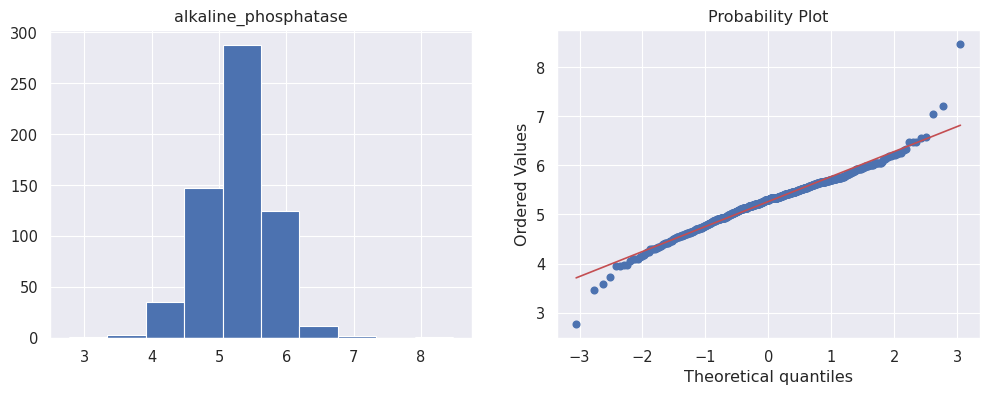

alanine_aminotransferase


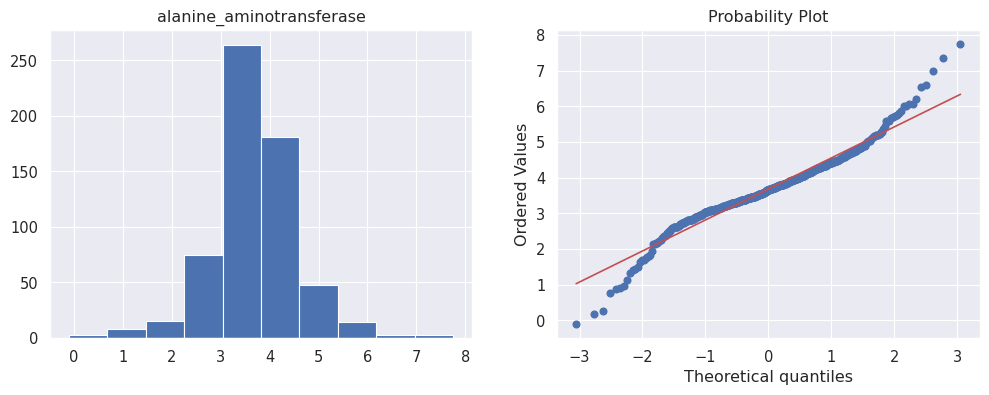

aspartate_aminotransferase


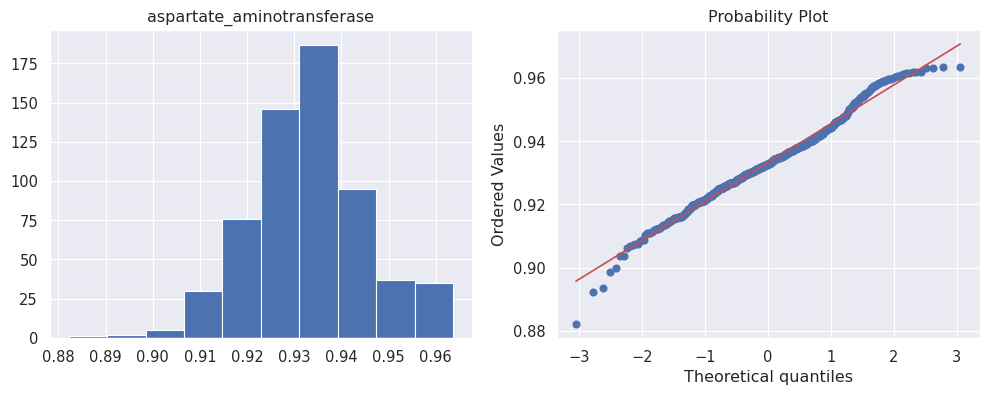

bilirubin


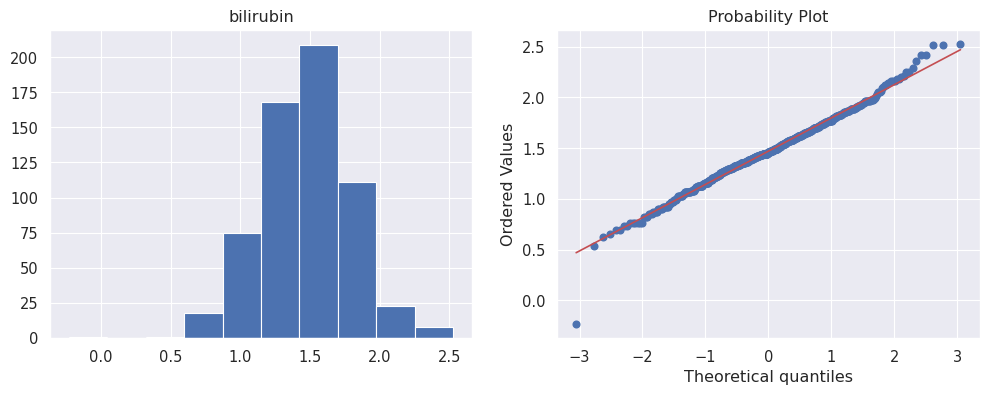

cholinesterase


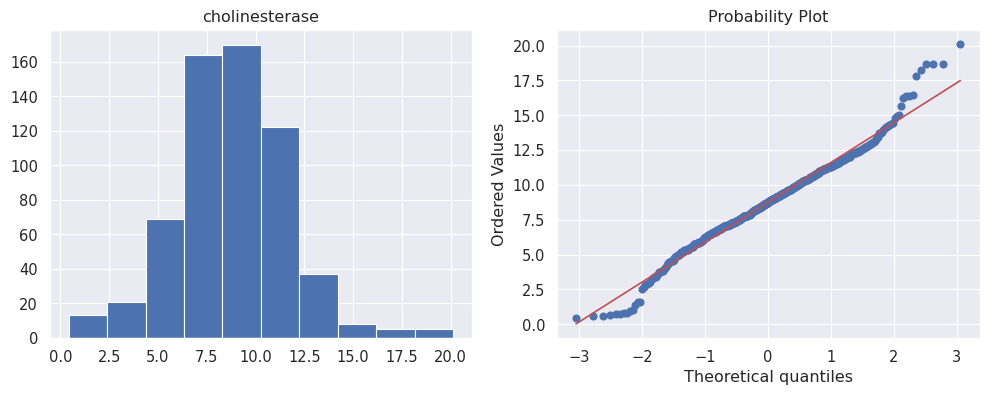

cholesterol


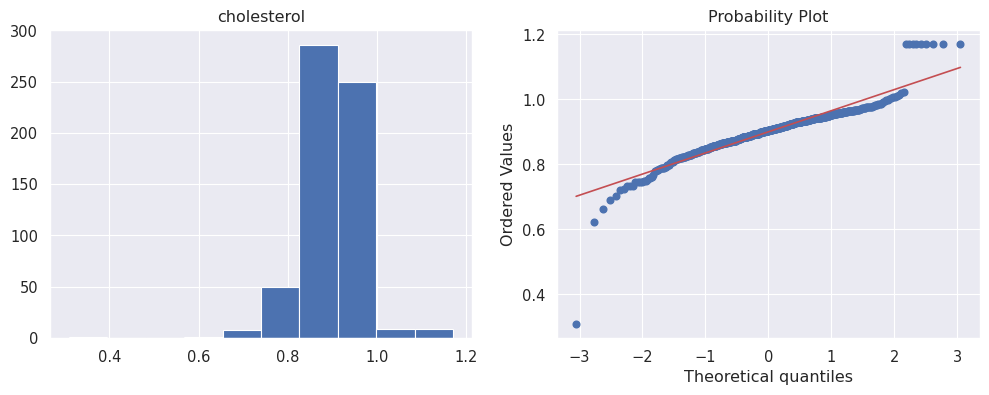

creatinina


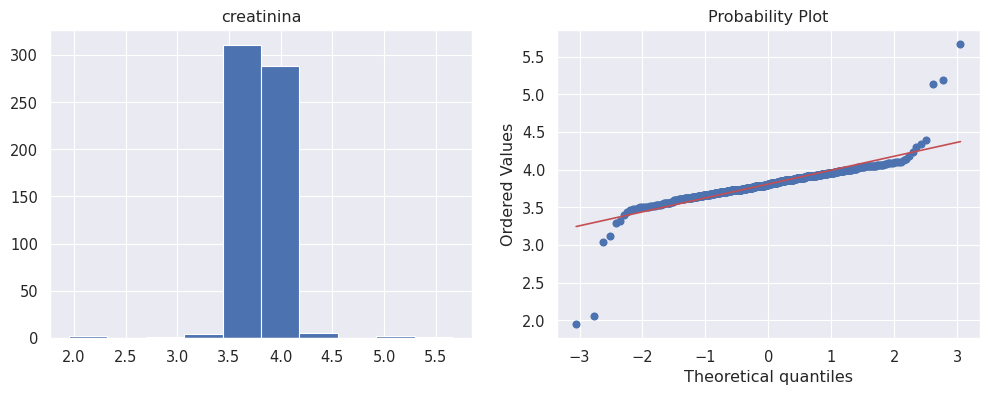

gamma_glutamyl_transferase


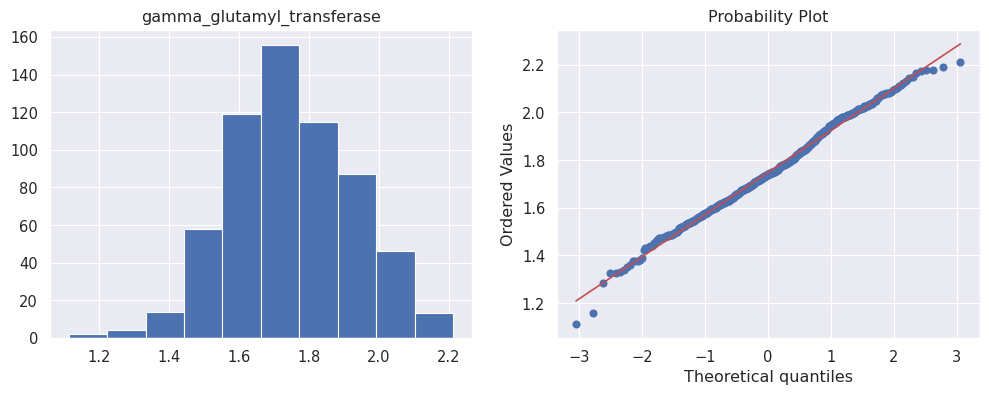

protein


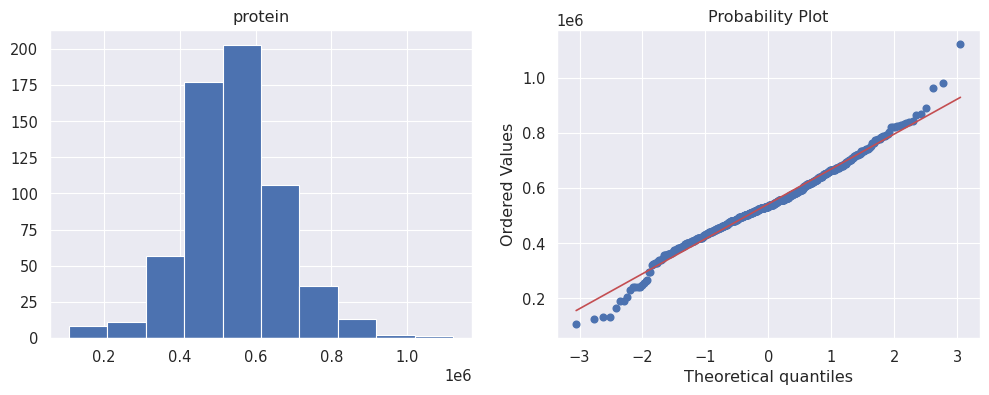

In [71]:
for item in hematological_features:
  probability_plot(df_raw,item)

**Distribution**

In [72]:
def normality_Test(dataset):
  dataset = dataset.dropna()
  data_numpy = dataset.to_numpy()
  return stats.normaltest(data_numpy)

In [73]:
def bartletts_sphericity(dataset):
  chi_square_value,p_value = factor_analyzer.calculate_bartlett_sphericity(dataset)
  return chi_square_value, p_value

In [74]:
def kmo_test(dataset):
  kmo_all,kmo_model = factor_analyzer.calculate_kmo(dataset)
  return kmo_all,kmo_model

In [75]:
!pip install factor-analyzer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 21.3 MB/s eta 0:00:00
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=82cc6f8edbf0bc532cffa77b4fde331331551f92330d6ca86e46f3cb3696395a
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor-analyzer


In [76]:
import factor_analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

print('Normality test values for raw dataset:', normality_Test(df_raw))
print()
print('Bartlett test of Sphericity values for raw dataset:', bartletts_sphericity(df_raw))
print()
print('KMO test values for raw dataset:', kmo_test(df_raw))
print()


Normality test values for raw dataset: NormaltestResult(statistic=array([3.33247959e+02, 1.05631974e+02, 5.53595928e+01, 4.92431295e+01,
       6.46629110e+00, 1.95100156e+01, 1.98421913e+01, 1.72026334e+02,
       1.97410834e+02, 9.13319568e-02, 2.27164336e+01]), pvalue=array([4.32638433e-73, 1.15427228e-23, 9.52395107e-13, 2.02763743e-11,
       3.94332642e-02, 5.80034651e-05, 4.91272999e-05, 4.41525932e-38,
       1.35763182e-43, 9.55361020e-01, 1.16731784e-05]))

Bartlett test of Sphericity values for raw dataset: (1666.3984632548606, 0.0)

KMO test values for raw dataset: (array([0.56055472, 0.63015396, 0.56631962, 0.47275446, 0.62226192,
       0.81371699, 0.78839824, 0.77966943, 0.56465527, 0.67588683,
       0.65525768]), 0.6366200613692665)



Here, the normality test tells us that the dataset does not come from a normal distribution. But after imputing missing values, the bartlett's test of sphericity tells us that the dataset is significant(p-value < 0.05), means not an identity matrix and KMO test for both the imputation technique also tells us that it is significant/ adequate dataset.

In [77]:
for var in hematological_features:
  print(f"For {var}:")

  print(stats.anderson(df_raw[var].iloc[100:500]))

  print()

For albumin:
AndersonResult(statistic=3.227793094075878, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=67.11549129903258, scale=9.586157688358085)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

For alkaline_phosphatase:
AndersonResult(statistic=0.2944670631017061, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=5.299766065114, scale=0.4261718753029543)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

For alanine_aminotransferase:
AndersonResult(statistic=1.6654583350616576, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=3.6632415065714703, scale=0.627324975587141)
 success: True
 message: '`anders

Our null hypothesis is, the data is normally distributed.

We can compare test statistic value to each critical value that corresponds to each significance level to see if the test results are significant. For example:

The critical value of albumin for α = 0.01 is 1.081. Because the test statistic (3.751) is greater than this critical value, the results are significant at a significance level of 0.01.
The critical value of albumin for α = 0.025 is 0.909. Because the test statistic (3.751) is greater than this critical value, the results are significant at a significance level of 0.025.
And so on.

We can see that the test results are significant at most significance level for most of the features, which means we would reject the null hypothesis of the test. Thus, we have sufficient evidence to say that the sample data is not normally distributed.

#**Correlation & Multicollinearity Checking**


**Pearson's Correlation with Heatmap**

In [78]:
mice_imputed_df.corr()

age       sex   albumin  \
age                         1.000000 -0.024544 -0.180746   
sex                        -0.024544  1.000000  0.149466   
albumin                    -0.180746  0.149466  1.000000   
alkaline_phosphatase        0.168473 -0.019547 -0.136513   
alanine_aminotransferase   -0.008385  0.163484  0.006369   
aspartate_aminotransferase  0.088666  0.130891 -0.185839   
bilirubin                   0.032492  0.111177 -0.217304   
cholinesterase             -0.075093  0.169111  0.367166   
cholesterol                 0.041290 -0.085986  0.092638   
creatinina                 -0.022296  0.159589 -0.003223   
gamma_glutamyl_transferase  0.153087  0.133276 -0.143805   
protein                    -0.152975  0.049063  0.558769   
category                    0.106341  0.060657 -0.255267   

                            alkaline_phosphatase  alanine_aminotransferase  \
age                                     0.168473                 -0.008385   
sex                                    -0.019547                  0.163484   
albumin                                -0.136513                  0.006369   
alkaline_phosphatase                    1.000000                  0.170930   
alanine_aminotransferase                0.170930                  1.000000   
aspartate_aminotransferase              0.062202                  0.272653   
bilirubin                               0.048600                 -0.038960   
cholinesterase                          0.032971                  0.148257   
cholesterol                             0.070049                  0.023046   
creatinina                              0.149554                 -0.043113   
gamma_glutamyl_transferase              0.442262                  0.246633   
protein                                -0.053520                  0.086294   
category                                0.028488                  0.110058   

                            aspartate_aminotransferase  bilirubin  \
age                                           0.088666   0.032492   
sex                                           0.130891   0.111177   
albumin                                      -0.185839  -0.217304   
alkaline_phosphatase                          0.062202   0.048600   
alanine_aminotransferase                      0.272653  -0.038960   
aspartate_aminotransferase                    1.000000   0.312231   
bilirubin                                     0.312231   1.000000   
cholinesterase                               -0.208536  -0.333172   
cholesterol                                   0.027395   0.110502   
creatinina                                   -0.021387   0.031224   
gamma_glutamyl_transferase                    0.491263   0.217024   
protein                                       0.033613  -0.073526   
category                                      0.648341   0.473006   

                            cholinesterase  cholesterol  creatinina  \
age                              -0.075093     0.041290   -0.022296   
sex                               0.169111    -0.085986    0.159589   
albumin                           0.367166     0.092638   -0.003223   
alkaline_phosphatase              0.032971     0.070049    0.149554   
alanine_aminotransferase          0.148257     0.023046   -0.043113   
aspartate_aminotransferase       -0.208536     0.027395   -0.021387   
bilirubin                        -0.333172     0.110502    0.031224   
cholinesterase                    1.000000     0.050396   -0.011157   
cholesterol                       0.050396     1.000000   -0.036075   
creatinina                       -0.011157    -0.036075    1.000000   
gamma_glutamyl_transferase       -0.110345     0.045143    0.121003   
protein                           0.300544     0.044909   -0.033349   
category                         -0.329472     0.044386    0.182040   

                            gamma_glutamyl_transferase   protein  category  
age                                           0.153087 -0.15

In [79]:
def corr_heatmap(dataset, titles=''):
  plt.figure(figsize = (14,7))
  sns.set_theme(context='paper', style='white', palette='deep')
  plt.title(titles)
  mask = np.triu(np.ones_like(dataset.corr(), dtype=bool))
  cmap = sns.diverging_palette(230, 20, as_cmap=True)
  sns.heatmap(dataset.corr(),annot=True,cmap=cmap,mask=mask)

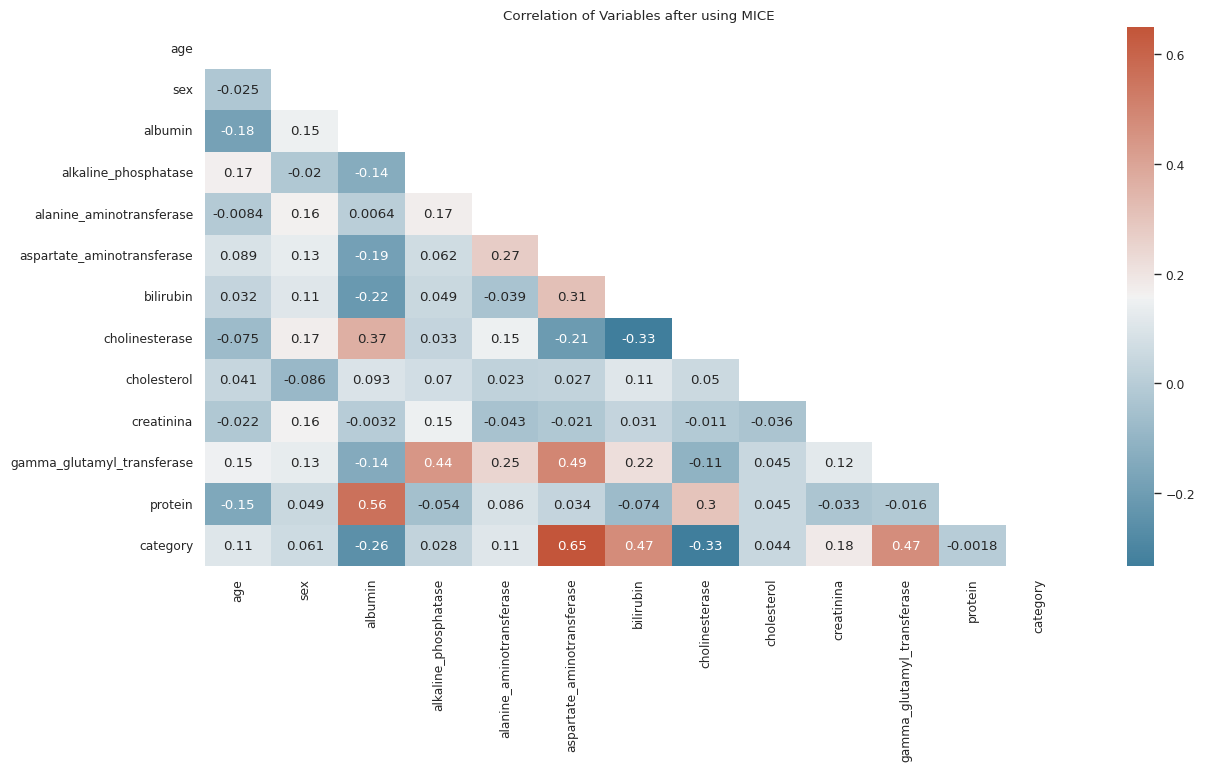

In [80]:
corr_heatmap(mice_imputed_df, 'Correlation of Variables after using MICE')

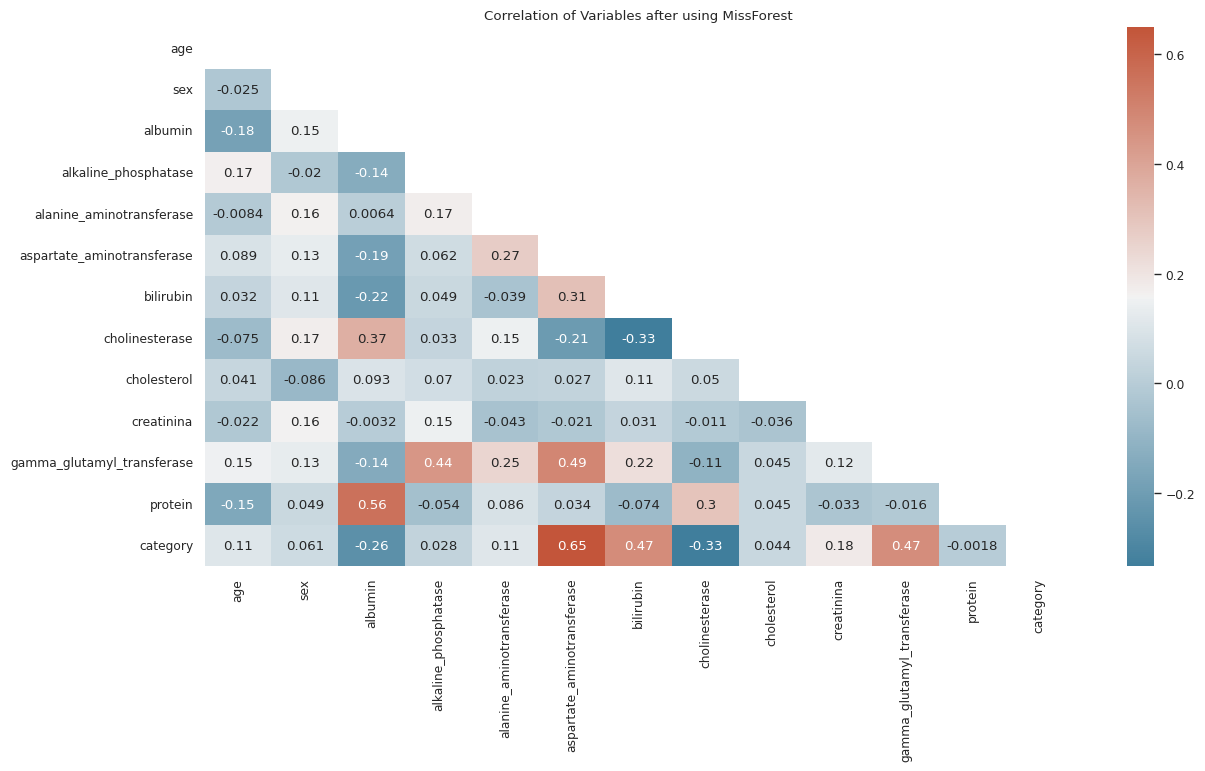

In [81]:
corr_heatmap(missForest_imputed_df, 'Correlation of Variables after using MissForest')

**Multicollinearity**

In [82]:
# compute the vif for all given features
def compute_vif(dataset_df_first, dataset_df_second, considered_features):
    X = dataset_df_first[considered_features].copy()

    Y = dataset_df_second[considered_features].copy()

    # create dataframe to store vif values
    vif = pd.DataFrame()

    vif["Variable"] = X.columns

    vif["VIF_MICE"] = [outliers_influence.variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    vif["VIF_MissForest"] = [outliers_influence.variance_inflation_factor(Y.values, i) for i in range(len(Y.columns))]

    return vif

In [83]:
pre_new_var=['age', 'albumin', 'alkaline_phosphatase', 'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin', 'cholinesterase', 'cholesterol', 'creatinina', 'gamma_glutamyl_transferase', 'protein']

new_var=['gamma_glutamyl_transferase', 'alkaline_phosphatase', 'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin']

In [84]:
compute_vif(mice_imputed_df, missForest_imputed_df, pre_new_var).sort_values('VIF_MICE', ascending=False)

Variable    VIF_MICE  VIF_MissForest
10                     protein  129.113695      129.113695
1                      albumin   86.853659       86.853659
0                          age   20.551538       20.551538
6               cholinesterase   20.034561       20.034561
2         alkaline_phosphatase   10.858583       10.858583
8                   creatinina    3.779589        3.779589
4   aspartate_aminotransferase    3.399901        3.399901
3     alanine_aminotransferase    2.677418        2.677418
9   gamma_glutamyl_transferase    2.628986        2.628986
7                  cholesterol    1.701058        1.701058
5                    bilirubin    1.670732        1.670732

In [85]:
compute_vif(mice_imputed_df, missForest_imputed_df, new_var).sort_values('VIF_MICE', ascending=False)

Variable  VIF_MICE  VIF_MissForest
1        alkaline_phosphatase  3.024027        3.024027
3  aspartate_aminotransferase  2.872401        2.872401
2    alanine_aminotransferase  2.484734        2.484734
0  gamma_glutamyl_transferase  2.268877        2.268877
4                   bilirubin  1.505329        1.505329

In [86]:
df_missforest_predictor = missForest_imputed_df.copy()

In [87]:
df_missforest_target = df_missforest_predictor['category']

In [88]:
df_missforest_predictor = df_missforest_predictor.drop('category', axis=1)

In [89]:
df_mice_predictor = mice_imputed_df.copy()

In [90]:
df_mice_target = df_mice_predictor['category']

In [91]:
df_mice_predictor = df_mice_predictor.drop('category', axis=1)

#**Feature Importance & Feature Selection**

In [92]:
def featureImportance(predictor, target, titles=''):
  sns.set_theme(context='paper')

  model = ensemble.RandomForestClassifier(random_state=42)

  model.fit(predictor, target)

  print(f"The shape is: {model.feature_importances_.shape}")

  feat_importances = pd.Series(model.feature_importances_, index=predictor.columns)

  clf = feature_selection.SelectFromModel(estimator=ensemble.RandomForestClassifier(random_state=42)).fit(predictor, target)

  X_new = clf.transform(predictor)

  print(X_new.shape )

  plt.title(titles)

  return feat_importances.nlargest(15).plot(kind='barh', color='r'), feat_importances

The shape is: (12,)
(615, 5)


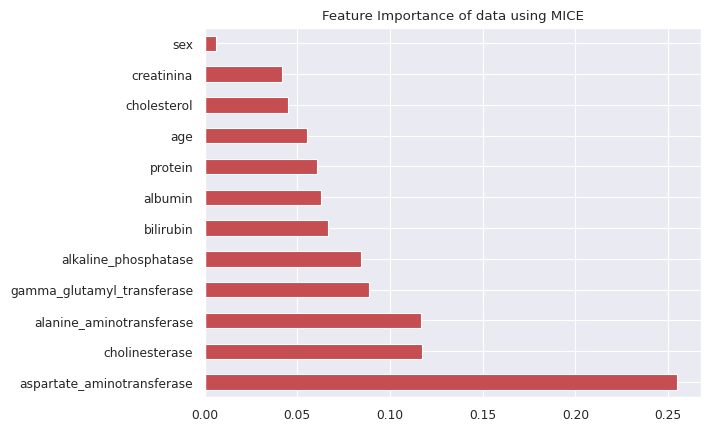

In [93]:
mice_feat_importance_plot, mice_feat_importance = featureImportance(df_mice_predictor, df_mice_target,'Feature Importance of data using MICE')

The shape is: (12,)
(615, 5)


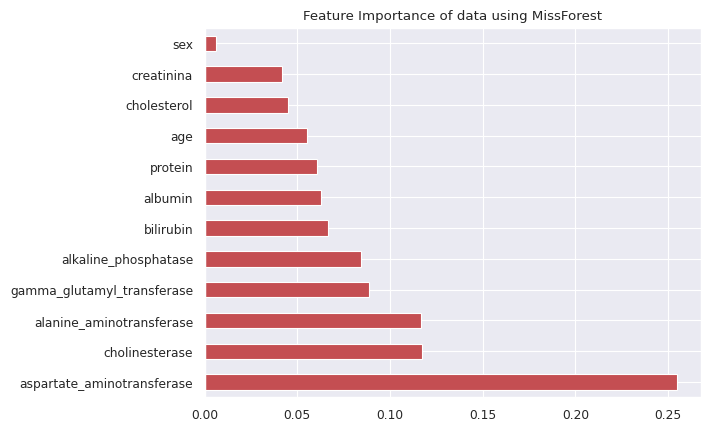

In [94]:
missforest_feat_importance_plot, missforest_feat_importance = featureImportance(df_missforest_predictor, df_missforest_target,
                                                                                'Feature Importance of data using MissForest')

In [95]:
rfe_mod = ensemble.ExtraTreesClassifier()

rfe = feature_selection.RFE(rfe_mod,n_features_to_select=5, step=1)

fit_rfe = rfe.fit(df_missforest_predictor, df_missforest_target)

print(f"Num Features: {fit_rfe.n_features_}")

print(f"Selected Features: {fit_rfe.support_}")

print(f"Feature Ranking: {fit_rfe.ranking_}")

Num Features: 5
Selected Features: [False False False  True  True  True False  True False False  True False]
Feature Ranking: [6 8 4 1 1 1 2 1 7 5 1 3]


In [96]:
feat_importance_comparison = pd.DataFrame({"Features": mice_feat_importance.index,

                                           "Importance% of MICE_df": mice_feat_importance.values*100,

                                           "Importance% of MissForest_df": missforest_feat_importance.values*100,

                                           "Selected_by_RFE": fit_rfe.support_})

In [97]:
feat_importance_comparison

Features  Importance% of MICE_df  \
0                          age                5.543288   
1                          sex                0.617665   
2                      albumin                6.298875   
3         alkaline_phosphatase                8.429242   
4     alanine_aminotransferase               11.682159   
5   aspartate_aminotransferase               25.485035   
6                    bilirubin                6.641626   
7               cholinesterase               11.719255   
8                  cholesterol                4.481381   
9                   creatinina                4.166890   
10  gamma_glutamyl_transferase                8.855886   
11                     protein                6.078700   

    Importance% of MissForest_df  Selected_by_RFE  
0                       5.543288            False  
1                       0.617665            False  
2                       6.298875            False  
3                       8.429242             True  
4                      11.682159             True  
5                      25.485035             True  
6                       6.641626            False  
7                      11.719255             True  
8                       4.481381            False  
9                       4.166890            False  
10                      8.855886             True  
11                      6.078700            False

In [98]:
feat_importance_comparison.groupby(['Selected_by_RFE'], dropna=False).sum()

<ipython-input-98-ffd4264f2868>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Importance% of MICE_df  Importance% of MissForest_df
Selected_by_RFE                                                      
False                         33.828424                     33.828424
True                          66.171576                     66.171576

Feature selection from MICE imputed set

In [99]:
mice_predictor_df = df_mice_predictor.drop([ 'age', 'sex', 'albumin', 'cholinesterase', 'cholesterol', 'creatinina', 'protein'], axis=1)

mice_target_df = df_mice_target.copy()

Feature Selection from MissForest imputed set

In [100]:
missforest_predictor_df = df_missforest_predictor.drop([ 'age', 'sex', 'albumin', 'cholinesterase', 'cholesterol', 'creatinina', 'protein'], axis=1)

missforest_target_df = df_missforest_target.copy()


#**Train Test Split**

In [101]:
def scalingMinMax(traindf, testdf):
  scaler = preprocessing.RobustScaler(quantile_range=(2.5, 97.5))

  feature_names = traindf.columns

  scaler.fit(traindf)

  df = scaler.transform(traindf)

  testdata = scaler.transform(testdf)

  df_train = pd.DataFrame(df, columns=feature_names)

  df_test = pd.DataFrame(testdata, columns=testdf.columns)

  return df_train, df_test

Train-Test_split for MICE imputed set

In [102]:
X_train_mice, X_test_mice, y_train_mice, y_test_mice = model_selection.train_test_split(mice_predictor_df, mice_target_df,
                                                                                test_size=0.20, random_state=42, stratify=mice_target_df)

In [103]:
X_train_mice, X_test_mice = scalingMinMax(X_train_mice, X_test_mice)

Train-Test-Split for MissForest imputed set

In [104]:
X_train_missforest, X_test_missforest, y_train_missforest, y_test_missforest = model_selection.train_test_split(missforest_predictor_df, missforest_target_df,
                                                                                test_size=0.20, random_state=42, stratify=missforest_target_df)

In [105]:
X_train_missforest, X_test_missforest = scalingMinMax(X_train_missforest, X_test_missforest)

**Initial Classifier**

In [106]:
def initial_RF(x_train, y_train, x_test, y_test):
  train_scores, test_scores = [], []
  values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
  for i in values:
	# configure the model
	  model = ensemble.RandomForestClassifier(max_depth=i)
	# fit model on the training dataset
	  model.fit(x_train, y_train)
	# evaluate on the train dataset
	  train_yhat = model.predict(x_train)
	  train_acc = metrics.accuracy_score(y_train, train_yhat)
	  train_scores.append(train_acc)
	# evaluate on the test dataset
	  test_yhat = model.predict(x_test)
	  test_acc = metrics.accuracy_score(y_test, test_yhat)
	  test_scores.append(test_acc)
	# summarize progress
	  print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
  plt.plot(values, train_scores, '-o', label='Train')
  plt.plot(values, test_scores, '-o', label='Test')
  plt.legend()
  plt.show()

>1, train: 0.882, test: 0.911
>2, train: 0.898, test: 0.911
>3, train: 0.931, test: 0.919
>4, train: 0.961, test: 0.919
>5, train: 0.982, test: 0.919
>6, train: 0.988, test: 0.919
>7, train: 0.992, test: 0.919
>8, train: 0.994, test: 0.919
>9, train: 0.998, test: 0.919
>10, train: 1.000, test: 0.919
>11, train: 1.000, test: 0.919
>12, train: 1.000, test: 0.919
>13, train: 1.000, test: 0.919
>14, train: 1.000, test: 0.919
>15, train: 1.000, test: 0.919
>16, train: 1.000, test: 0.919
>17, train: 1.000, test: 0.919
>18, train: 1.000, test: 0.919
>19, train: 1.000, test: 0.919
>20, train: 1.000, test: 0.919


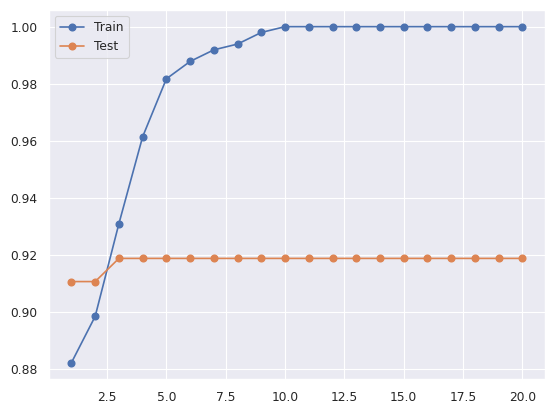

In [107]:
initial_RF(X_train_mice, y_train_mice, X_test_mice, y_test_mice)

We can see from the graph that the model overfits.

#**Oversampling To Handle Overfitting**


**SMOTE for training data**

In [108]:
def smoteForOverfitting(df_input, df_output):
  counter = collections.Counter(df_output)
  print(counter)
  oversample = over_sampling.SMOTE(random_state = 42)
  x_oversampled, y_oversampled = oversample.fit_resample(df_input, df_output)
  countertwo = collections.Counter(y_oversampled)
  print(countertwo)
  return x_oversampled, y_oversampled


In [109]:
smote_mice_predictor, smote_mice_target= smoteForOverfitting(X_train_mice, y_train_mice)

Counter({0: 426, 4: 24, 2: 19, 3: 17, 1: 6})
Counter({2: 426, 0: 426, 4: 426, 3: 426, 1: 426})


In [110]:
smote_mice_predictor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   alkaline_phosphatase        2130 non-null   float64
 1   alanine_aminotransferase    2130 non-null   float64
 2   aspartate_aminotransferase  2130 non-null   float64
 3   bilirubin                   2130 non-null   float64
 4   gamma_glutamyl_transferase  2130 non-null   float64
dtypes: float64(5)
memory usage: 83.3 KB


In [111]:
smote_missforest_predictor, smote_missforest_target = smoteForOverfitting(X_train_missforest, y_train_missforest)

Counter({0: 426, 4: 24, 2: 19, 3: 17, 1: 6})
Counter({2: 426, 0: 426, 4: 426, 3: 426, 1: 426})


In [112]:
smote_missforest_predictor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   alkaline_phosphatase        2130 non-null   float64
 1   alanine_aminotransferase    2130 non-null   float64
 2   aspartate_aminotransferase  2130 non-null   float64
 3   bilirubin                   2130 non-null   float64
 4   gamma_glutamyl_transferase  2130 non-null   float64
dtypes: float64(5)
memory usage: 83.3 KB


**SMOTE full set visualization**

**Parallel Coordinate Plot For Comparison of Numerical Features in terms of Target Feature**

In [113]:
smote_missforest_full = pd.concat([smote_missforest_predictor, smote_missforest_target], axis=1)

smote_mice_full = pd.concat([smote_mice_predictor, smote_mice_target], axis=1)

In [114]:
def scalingMinMaxraw(rawdf):
  scaler = preprocessing.RobustScaler(quantile_range=(2.5, 97.5))
  feature_names = rawdf.columns
  scaler.fit(rawdf)
  df = scaler.transform(rawdf)
  df_raw = pd.DataFrame(df, columns=feature_names)
  return df_raw

In [115]:
parallel_smote_missforest = smote_missforest_full.copy()
parallel_smote_mice = smote_mice_full.copy()
parallel_raw = hcv_demo[['alkaline_phosphatase', 'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin', 'gamma_glutamyl_transferase', 'category']].copy()

In [116]:
parallel_raw_scaled = scalingMinMaxraw(parallel_raw[['alkaline_phosphatase', 'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin', 'gamma_glutamyl_transferase']])
parallel_raw_scaled = pd.concat([parallel_raw_scaled, parallel_raw['category']],axis=1)

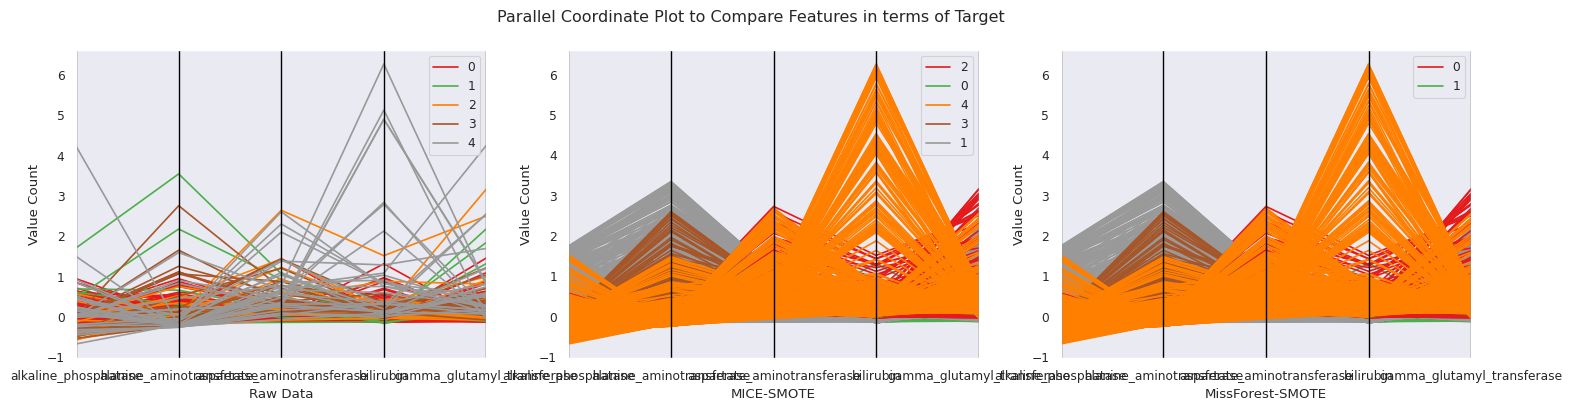

In [117]:
fig, axes = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
fig.suptitle("Parallel Coordinate Plot to Compare Features in terms of Target")
parallel_plot_raw = pd.plotting.parallel_coordinates(parallel_raw_scaled, 'category', ax=axes[0], colormap=plt.get_cmap("Set1"))
parallel_plot_mice_smote = pd.plotting.parallel_coordinates(parallel_smote_mice, 'category', ax=axes[1], colormap=plt.get_cmap("Set1"))
parallel_plot_missforest_smote = pd.plotting.parallel_coordinates(parallel_smote_missforest, 'category', ax=axes[2], colormap=plt.get_cmap("Set1"))
parallel_plot_raw.set_xlabel("Raw Data")
parallel_plot_raw.set_ylabel("Value Count")
plt.legend(['0','1'])
parallel_plot_mice_smote.set_xlabel("MICE-SMOTE")
parallel_plot_mice_smote.set_ylabel("Value Count")
parallel_plot_missforest_smote.set_xlabel("MissForest-SMOTE")
parallel_plot_missforest_smote.set_ylabel("Value Count")
plt.show()

We can see the differences after SMOTE in the datasets, some of the points were given importance differently in different datasets.

**Sankey Plot to visualize the mean distribution for different Categories**

In [118]:
hematological_features_smote = ['alkaline_phosphatase', 'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin', 'gamma_glutamyl_transferase']

In [119]:
feature_mean_list_smote = []
for item in hematological_features_smote:
  feature_mean_list_smote.append(list(smote_missforest_full.groupby(by='category')[item].mean().values))

In [120]:
label_list_smote = ['alkaline_phosphatase', 'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin', 'gamma_glutamyl_transferase',
              'No Disease', 'Disease']

#'albumin':0, 'alkaline_phosphatase':1, 'alanine_aminotransferase':2, 'aspartate_aminotransferase':3,'bilirubin':4, 'cholinesterase':5, 'cholesterol':6, 'creatinina':7, 'gamma_glutamyl_transferase':8,
#'PROT':9, 'No Disease':10, 'Suspect':11, 'Hepatitis':12,'Fibrosis':13,'Cirrhosis':14

In [121]:
#defines how many links will generate for each source

source_smote = []

for index, item in enumerate(feature_mean_list_smote):

  for inner_item in item:

    source_smote.append(index)

In [122]:
#defines which link will hit/reach which target

target_smote = []

for item in feature_mean_list_smote:

  for i in range(5, 7):

    target_smote.append(i)

In [123]:
#defines the width/value of links

link_value_smote = [inner_item for item in feature_mean_list_smote for inner_item in item ]

In [124]:
fig = go.Figure(data=[go.Sankey(
    node = {"label": label_list_smote},
    link = {"source": source_smote, "target": target_smote, "value": link_value_smote}
    )])

fig.show()

It's noticeable that links connected to DIsease category have more durability than we think.

In [125]:
smote_mice_full = pd.concat([smote_mice_predictor, smote_missforest_target], axis=1)

In [126]:
feature_mean_list_smote = []

for item in hematological_features_smote:
  feature_mean_list_smote.append(list(smote_mice_full.groupby(by='category')[item].mean().values))

In [127]:
label_list_smote = ['alkaline_phosphatase', 'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin', 'gamma_glutamyl_transferase',
              'No Disease', 'Disease']

#'albumin':0, 'alkaline_phosphatase':1, 'alanine_aminotransferase':2, 'aspartate_aminotransferase':3,'bilirubin':4, 'cholinesterase':5, 'cholesterol':6, 'creatinina':7, 'gamma_glutamyl_transferase':8,
#'PROT':9, 'No Disease':10, 'Suspect':11, 'Hepatitis':12,'Fibrosis':13,'Cirrhosis':14

In [128]:
#defines how many links will generate for each source

source_smote = []
for index, item in enumerate(feature_mean_list_smote):
  for inner_item in item:
    source_smote.append(index)

In [129]:
#defines which link will hit/reach which target

target_smote = []
for item in feature_mean_list_smote:
  for i in range(5, 7):
    target_smote.append(i)

In [130]:
#defines the width/value of links

link_value_smote = [inner_item for item in feature_mean_list_smote for inner_item in item ]

In [131]:
fig = go.Figure(data=[go.Sankey(
    node = {"label": label_list_smote},
    link = {"source": source_smote, "target": target_smote, "value": link_value_smote}
    )])

fig.show()

We notice that the mean for 'Disease' in features are higher/lower by a lot than the mean for 'No Disease'.

**Scatter Plot to compare between features**

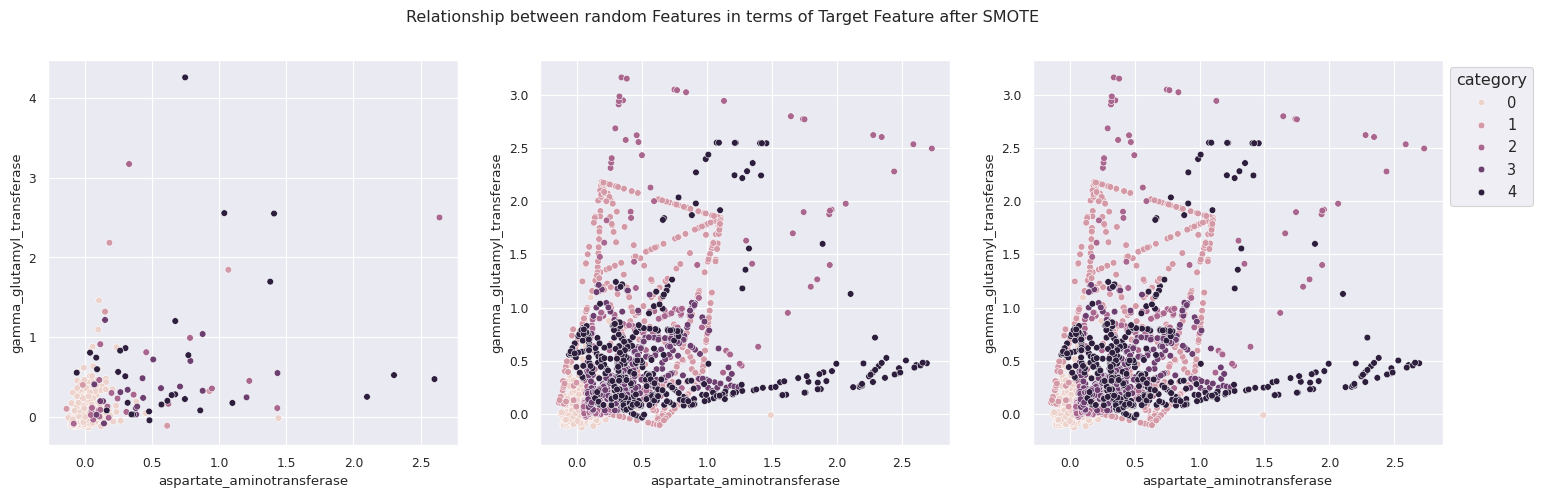

In [132]:
fig, axes = plt.subplots(figsize=[18,5], nrows=1, ncols=3)
fig.suptitle('Relationship between random Features in terms of Target Feature after SMOTE')
sns.set_theme(context='paper', font_scale=1.2)
scatter_raw = sns.scatterplot(data=parallel_raw_scaled, ax=axes[0], x="aspartate_aminotransferase", y="gamma_glutamyl_transferase", hue="category")
scatter_raw.legend([],[], frameon=False)
scatter_mice_smote = sns.scatterplot(data=smote_missforest_full, ax=axes[1], x="aspartate_aminotransferase", y="gamma_glutamyl_transferase", hue="category")
scatter_mice_smote.legend([],[], frameon=False)
scatter_missforest_smote = sns.scatterplot(data=smote_mice_full, ax=axes[2], x="aspartate_aminotransferase", y="gamma_glutamyl_transferase", hue="category")
sns.move_legend(scatter_missforest_smote, "upper left", bbox_to_anchor=(1, 1))

We can see after SMOTE, the dataset is now balanced across features.

#**Hyper Parameter Tuning For TREES**

In [133]:
# Number of trees in random forest
n_estimators = [32, 36, 48, 56, 60]

# Number of features to consider at every split
max_features = ['sqrt']

# Maximum number of levels in tree
max_depth = [42, 51, 60, 72, 75]

# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Method of selecting samples for training each tree
bootstrap = [False]

In [134]:
random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [135]:
randomforest = ensemble.RandomForestClassifier()

In [136]:
extratrees = ensemble.ExtraTreesClassifier()

In [137]:
def treeHPTune(estimator_model, cv, n_iter, predictor, target):
  # model = model_selection.RandomizedSearchCV(estimator = estimator_model,param_distributions = random_grid,

  #                                            n_iter = n_iter, cv = cv, verbose=2,  n_jobs = -1)


  model = model_selection.GridSearchCV(estimator = estimator_model, param_grid = random_grid,

                                              cv = cv, verbose=2,  n_jobs = -1, scoring='accuracy')

  model.fit(predictor, target)

  return model.best_params_

In [138]:
params_randomforest_missforest = treeHPTune(estimator_model = randomforest,
                                            cv = model_selection.StratifiedShuffleSplit(n_splits=10, test_size=0.2),
                                            n_iter = 200, predictor = smote_missforest_predictor, target = smote_missforest_target)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


In [139]:
params_randomforest_missforest

{'bootstrap': False,
 'max_depth': 51,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 36}

In [140]:
# 1/0

In [141]:
params_randomforest_mice = treeHPTune(estimator_model = randomforest,
                                      cv = model_selection.StratifiedShuffleSplit(n_splits=10, test_size=0.2),
                                      n_iter = 200, predictor = smote_mice_predictor, target = smote_mice_target)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


In [142]:
params_randomforest_mice

{'bootstrap': False,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 48}

In [143]:
params_extratrees_mice = treeHPTune(estimator_model = extratrees,
                                    cv = model_selection.StratifiedShuffleSplit(n_splits=10, test_size=0.2),
                                    n_iter = 200,  predictor = smote_mice_predictor, target = smote_mice_target)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


In [144]:
params_extratrees_mice

{'bootstrap': False,
 'max_depth': 72,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 56}

In [157]:
params_extratrees_missforest = treeHPTune(estimator_model = extratrees,
                                          cv = model_selection.StratifiedShuffleSplit(n_splits=10, test_size=0.2),
                                          n_iter = 200, predictor = smote_missforest_predictor, target = smote_missforest_target)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


In [160]:
params_extratrees_missforest

{'bootstrap': False,
 'max_depth': 75,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 56}

In [161]:
best_ETC = {'bootstrap': False,
 'max_depth': 42,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 60}

bst_ETC = {'bootstrap': False,
 'max_depth': 72,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 32}

best_etc = {'bootstrap': False,
 'max_depth': 57,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 36}

#**Training Model**

In [162]:
model_accuracy_score = []

##**Random Forest Classifier**

In [163]:
def rf_model(x_train, y_train, params):
  model = ensemble.RandomForestClassifier(**params, random_state=42)

  model.fit(x_train, y_train)

  return model

For SMOTE+ITERATIVE IMPUTER

In [164]:
mice_rf = rf_model(smote_mice_predictor, smote_mice_target, params_randomforest_mice)

model_accuracy_score.append(mice_rf.score(X_test_mice, y_test_mice))

mice_rf.score(X_test_mice, y_test_mice)

0.9024390243902439

For SMOTE+MissForest

In [165]:
missforest_rf = rf_model(smote_missforest_predictor, smote_missforest_target, params_randomforest_missforest)

model_accuracy_score.append(missforest_rf.score(X_test_missforest, y_test_missforest))

missforest_rf.score(X_test_missforest, y_test_missforest)

0.8943089430894309

##**Extra Tree Classifier**

In [166]:
def ef_model(x_train, y_train, params):
  model = ensemble.ExtraTreesClassifier(**params, random_state=42)

  model.fit(x_train, y_train)

  return model

For SMOTE+ITERATIVE IMPUTER

In [167]:
mice_etc = ef_model(smote_mice_predictor, smote_mice_target, params_extratrees_mice)

model_accuracy_score.append(mice_etc.score(X_test_mice, y_test_mice))

mice_etc.score(X_test_mice, y_test_mice)

0.8861788617886179

For SMOTE+MissForest

In [168]:
missforest_etc = ef_model(smote_missforest_predictor, smote_missforest_target, params_extratrees_missforest)

model_accuracy_score.append(missforest_etc.score(X_test_missforest, y_test_missforest))

missforest_etc.score(X_test_missforest, y_test_missforest)

0.8780487804878049

##**Multilayer Perceptron**

In [169]:
parameter_space = {
    'hidden_layer_sizes': [(100, 200, 100), (50,100,50)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['invscaling', 'adaptive'],
    'max_iter': [500, 1000],
    'warm_start': [True, False]
}

In [170]:
def mlp_Cl(predictor, target):
  kf = model_selection.StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

  mlp = neural_network.MLPClassifier(random_state=42)

  clf = model_selection.RandomizedSearchCV(mlp, parameter_space, n_jobs=-1, cv=kf, verbose=2)

  # clf = model_selection.GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=kf, verbose=2)

  clf_fitted = clf.fit(predictor, target)

  return clf_fitted, clf_fitted.best_params_

Multilayer Perceptron+Mice

In [171]:
mlp_model_mice, mlp_param_mice = mlp_Cl(smote_mice_predictor, smote_mice_target)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [172]:
model_accuracy_score.append(mlp_model_mice.score(X_test_mice, y_test_mice))

mlp_model_mice.score(X_test_mice, y_test_mice)

0.9186991869918699

Multilayer Perceptron+MissForest

In [173]:
mlp_model_missforest, mlp_param_missforest = mlp_Cl(smote_missforest_predictor, smote_missforest_target)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [174]:
mlp_param_missforest

{'warm_start': True,
 'solver': 'adam',
 'max_iter': 500,
 'learning_rate': 'invscaling',
 'hidden_layer_sizes': (100, 200, 100),
 'alpha': 0.0001,
 'activation': 'relu'}

In [175]:
model_accuracy_score.append(mlp_model_missforest.score(X_test_missforest, y_test_missforest))

mlp_model_missforest.score(X_test_missforest, y_test_missforest)

0.9186991869918699

##**SVM Classifier**

**Hyperparameter Tuning**

In [176]:
# defining parameter range
param_gridS = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','poly'],
              'degree':[1],
              'decision_function_shape':['ovo', 'ovr']}

def svmParam(predictor, target, param_gridS):
  kf = model_selection.StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

  grid = model_selection.GridSearchCV(svm.SVC(), param_grid=param_gridS, cv=kf, verbose = 1)

  # fitting the model for grid search
  grid.fit(predictor,target)

  return grid.best_params_

In [177]:
svm_params_missforest = svmParam(smote_missforest_predictor, smote_missforest_target, param_gridS)

print(svm_params_missforest)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
{'C': 10, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}


In [178]:
svm_params_mice = svmParam(smote_mice_predictor, smote_mice_target, param_gridS)

print(svm_params_mice)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
{'C': 10, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}


**Model SVM**

In [179]:
def svm_model(x_train, y_train, params):
  svm_mod = svm.SVC(**params)

  model = calibration.CalibratedClassifierCV(svm_mod)


  model.fit(x_train, y_train)

  return model

SVM+Mice

In [180]:
mice_svm = svm_model(smote_mice_predictor, smote_mice_target, svm_params_mice)

model_accuracy_score.append(mice_svm.score(X_test_mice, y_test_mice))

mice_svm.score(X_test_mice, y_test_mice)

0.6504065040650406

SVM+MissForest

In [181]:
missforest_svm = svm_model(smote_missforest_predictor, smote_missforest_target, svm_params_missforest)

model_accuracy_score.append(missforest_svm.score(X_test_missforest, y_test_missforest))

missforest_svm.score(X_test_missforest, y_test_missforest)

0.6504065040650406

##**KNeighbors Classifier**

**Hyperparameter tuning**

In [182]:
grid_paramsKn = { 'n_neighbors' : [5,7,9,11,13,15,20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski', 'manhattan'],
               'algorithm':['auto', 'kd_tree'],
               'leaf_size':[10,15,20,25,40,50]}

In [183]:
def knn_param(predictor, target, grid_paramsKn):
  kf = model_selection.StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

  gs = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(), param_grid=grid_paramsKn, verbose = 1, cv=kf, n_jobs = -1)

  gs_knn = gs.fit(predictor, target)

  return gs_knn.best_params_

In [184]:
kn_params_mice = knn_param(smote_mice_predictor, smote_mice_target, grid_paramsKn)

Fitting 10 folds for each of 336 candidates, totalling 3360 fits


In [185]:
kn_params_missforest = knn_param(smote_missforest_predictor, smote_missforest_target, grid_paramsKn)

Fitting 10 folds for each of 336 candidates, totalling 3360 fits


**Model KNeighborsClassifier**

In [186]:
def knn_model(x_train, y_train, params):
  model = neighbors.KNeighborsClassifier(**params)

  model.fit(x_train, y_train)

  return model

KNN+MICE

In [187]:
mice_knn = knn_model(smote_mice_predictor, smote_mice_target, kn_params_mice)

model_accuracy_score.append(mice_knn.score(X_test_mice, y_test_mice))

mice_knn.score(X_test_mice, y_test_mice)

0.8373983739837398

KNN+MissForest

In [188]:
missforest_knn = knn_model(smote_missforest_predictor, smote_missforest_target, kn_params_missforest)

model_accuracy_score.append(missforest_knn.score(X_test_missforest, y_test_missforest))

missforest_knn.score(X_test_missforest, y_test_missforest)

0.8373983739837398

In [189]:
model_accuracy_score

[0.9024390243902439,
 0.8943089430894309,
 0.8861788617886179,
 0.8780487804878049,
 0.9186991869918699,
 0.9186991869918699,
 0.6504065040650406,
 0.6504065040650406,
 0.8373983739837398,
 0.8373983739837398]

#**Model Evaluation and Comparison**

In [190]:
nested_cv_acc_list = []

norm_cv_acc_list = []

##K-Fold Cross Validation

In [191]:
def kfold_valid(predictor, target, classifier, splits, nested=True, params=None):
  kf = model_selection.StratifiedShuffleSplit(n_splits=splits, test_size=0.2, random_state=42)

  kf_gridSearch = model_selection.StratifiedShuffleSplit(n_splits=10, test_size=0.2)

  fold = 0

  score_kfold = []

  for train_index, test_index in kf.split(predictor,target):

    fold+=1

    X_train = predictor.iloc[train_index]

    y_train = target[train_index]

    X_test = predictor.iloc[test_index]

    y_test = target[test_index]

    X_train, X_test = scalingMinMax(X_train, X_test)

    smot = over_sampling.SMOTE()

    X_train_oversampled, y_train_oversampled = smot.fit_resample(X_train, y_train)

    if nested:

      if classifier=='rf':

        model = ensemble.RandomForestClassifier(**treeHPTune(ensemble.RandomForestClassifier(), kf_gridSearch, 200, X_train_oversampled, y_train_oversampled))

      elif classifier=='etc':

        model = ensemble.ExtraTreesClassifier(**treeHPTune(ensemble.ExtraTreesClassifier(), kf_gridSearch, 200, X_train_oversampled, y_train_oversampled))

      elif classifier=='svm':

        svm_= svm.SVC(**svmParam(X_train_oversampled, y_train_oversampled, param_gridS))

        model = calibration.CalibratedClassifierCV(svm_)

      elif classifier=='knn':

        model = neighbors.KNeighborsClassifier(**knn_param(X_train_oversampled, y_train_oversampled, grid_paramsKn))

      elif classifier=='mlp':

        mlp_model, mlpparam_= mlp_Cl(X_train_oversampled, y_train_oversampled)

        model = neural_network.MLPClassifier(**mlpparam_)

    elif not nested:

      if classifier=='rf':

        model = ensemble.RandomForestClassifier(**params)

      elif classifier=='etc':

        model = ensemble.ExtraTreesClassifier(**params)

      elif classifier=='svm':

        svm_= svm.SVC(**params)

        model = calibration.CalibratedClassifierCV(svm_)

      elif classifier=='knn':

        model = neighbors.KNeighborsClassifier(**params)

      elif classifier=='mlp':

        model = neural_network.MLPClassifier(**params)

    model.fit(X_train_oversampled, y_train_oversampled )

    y_pred = model.predict(X_test)

    score_kfold.append(model.score(X_test, y_test))

    print(f'For fold {fold}:')

    print(f'Accuracy: {model.score(X_test, y_test)}')

  return score_kfold

Random Forest(MICE & MissForest)

In [192]:
# RandomForest cross validation
nested_cross_score_RF_mice = kfold_valid(mice_predictor_df, mice_target_df, 'rf', 5 )
nested_cross_score_RF_mice = np.array(nested_cross_score_RF_mice)
nested_cv_acc_list.append(nested_cross_score_RF_mice.mean())
print(f'RF-MICE-Nested-Cross Validation accuracy = {round(nested_cross_score_RF_mice.mean(), 4)} ± {round(nested_cross_score_RF_mice.std(), 4)}')

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 1:
Accuracy: 0.9024390243902439
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 2:
Accuracy: 0.9186991869918699
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 3:
Accuracy: 0.8861788617886179
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 4:
Accuracy: 0.8861788617886179
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 5:
Accuracy: 0.8861788617886179
RF-MICE-Nested-Cross Validation accuracy = 0.8959 ± 0.013


In [193]:
cross_score_RF_mice = kfold_valid(mice_predictor_df, mice_target_df, 'rf', 5, nested=False, params=params_randomforest_mice )

cross_score_RF_mice = np.array(cross_score_RF_mice)

norm_cv_acc_list.append(cross_score_RF_mice.mean())

print(f'RF-MICE-Cross Validation accuracy = {round(cross_score_RF_mice.mean(), 4)} ± {round(cross_score_RF_mice.std(), 4)}')

For fold 1:
Accuracy: 0.9105691056910569
For fold 2:
Accuracy: 0.9105691056910569
For fold 3:
Accuracy: 0.8780487804878049
For fold 4:
Accuracy: 0.8780487804878049
For fold 5:
Accuracy: 0.8780487804878049
RF-MICE-Cross Validation accuracy = 0.8911 ± 0.0159


In [194]:
# RandomForest cross validation
nested_cross_score_RF_missforest = kfold_valid(missforest_predictor_df, missforest_target_df, 'rf', 5 )

nested_cross_score_RF_missforest = np.array(nested_cross_score_RF_missforest)

nested_cv_acc_list.append(nested_cross_score_RF_missforest.mean())

print(f'RF-MissForest-Nested-Cross Validation accuracy = {round(nested_cross_score_RF_missforest.mean(), 4)} ± {round(nested_cross_score_RF_missforest.std(), 4)}')

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 1:
Accuracy: 0.8943089430894309
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 2:
Accuracy: 0.9024390243902439
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 3:
Accuracy: 0.8780487804878049
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 4:
Accuracy: 0.9024390243902439
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 5:
Accuracy: 0.9186991869918699
RF-MissForest-Nested-Cross Validation accuracy = 0.8992 ± 0.0132


In [195]:
cross_score_RF_missforest = kfold_valid(missforest_predictor_df, missforest_target_df, 'rf', 5, nested=False, params=params_randomforest_missforest )

cross_score_RF_missforest = np.array(cross_score_RF_missforest)

norm_cv_acc_list.append(cross_score_RF_missforest.mean())

print(f'RF-MissForest-Cross Validation accuracy = {round(cross_score_RF_missforest.mean(), 4)} ± {round(cross_score_RF_missforest.std(), 4)}')

For fold 1:
Accuracy: 0.8617886178861789
For fold 2:
Accuracy: 0.8943089430894309
For fold 3:
Accuracy: 0.8780487804878049
For fold 4:
Accuracy: 0.8943089430894309
For fold 5:
Accuracy: 0.9105691056910569
RF-MissForest-Cross Validation accuracy = 0.8878 ± 0.0166


ExtraTreesClassifier(MICE & MissForest)

In [196]:
# ExtraTrees cross validation
nested_cross_score_ETC_mice = kfold_valid(mice_predictor_df, mice_target_df, 'etc', 5 )

nested_cross_score_ETC_mice = np.array(nested_cross_score_ETC_mice)

nested_cv_acc_list.append(nested_cross_score_ETC_mice.mean())

print(f'ETC-MICE-Cross Validation accuracy = {round(nested_cross_score_ETC_mice.mean(), 4)} ± {round(nested_cross_score_ETC_mice.std(), 4)}')

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 1:
Accuracy: 0.8861788617886179
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 2:
Accuracy: 0.9105691056910569
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 3:
Accuracy: 0.8861788617886179
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 4:
Accuracy: 0.9186991869918699
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 5:
Accuracy: 0.9186991869918699
ETC-MICE-Cross Validation accuracy = 0.9041 ± 0.0149


In [197]:
cross_score_ETC_mice = kfold_valid(mice_predictor_df, mice_target_df, 'etc', 5, nested=False, params=params_extratrees_mice)

cross_score_ETC_mice = np.array(cross_score_ETC_mice)

norm_cv_acc_list.append(cross_score_ETC_mice.mean())

print(f'ETC-MICE-Cross Validation accuracy = {round(cross_score_ETC_mice.mean(), 4)} ± {round(cross_score_ETC_mice.std(), 4)}')

For fold 1:
Accuracy: 0.8617886178861789
For fold 2:
Accuracy: 0.8943089430894309
For fold 3:
Accuracy: 0.9105691056910569
For fold 4:
Accuracy: 0.926829268292683
For fold 5:
Accuracy: 0.9186991869918699
ETC-MICE-Cross Validation accuracy = 0.9024 ± 0.023


In [198]:
# ExtraTrees cross validation
nested_cross_score_ETC_missforest = kfold_valid(missforest_predictor_df, missforest_target_df, 'etc', 5 )

nested_cross_score_ETC_missforest = np.array(nested_cross_score_ETC_missforest)

nested_cv_acc_list.append(nested_cross_score_ETC_missforest.mean())

print(f'ETC-MissForest-Cross Validation accuracy = {round(nested_cross_score_ETC_missforest.mean(), 4)} ± {round(nested_cross_score_ETC_missforest.std(), 4)}')

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 1:
Accuracy: 0.8943089430894309
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 2:
Accuracy: 0.9024390243902439
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 3:
Accuracy: 0.8943089430894309
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 4:
Accuracy: 0.9186991869918699
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 5:
Accuracy: 0.9105691056910569
ETC-MissForest-Cross Validation accuracy = 0.9041 ± 0.0095


In [ ]:
cross_score_ETC_missforest = kfold_valid(missforest_predictor_df, missforest_target_df, 'etc', 5, nested=False, params=bst_ETC )

cross_score_ETC_missforest = np.array(cross_score_ETC_missforest)

norm_cv_acc_list.append(cross_score_ETC_missforest.mean())

print(f'ETC-MissForest-Cross Validation accuracy = {round(cross_score_ETC_missforest.mean(), 4)} ± {round(cross_score_ETC_missforest.std(), 4)}')

Multilayer Perceptron(MICE & MissForest)

In [ ]:
# MLP cross validation
nested_cross_score_MLP_mice = kfold_valid(mice_predictor_df, mice_target_df, 'mlp', 5 )

nested_cross_score_MLP_mice = np.array(nested_cross_score_MLP_mice)

nested_cv_acc_list.append(nested_cross_score_MLP_mice.mean())

print(f'MLP-MICE-Cross Validation accuracy = {round(nested_cross_score_MLP_mice.mean(), 4)} ± {round(nested_cross_score_MLP_mice.std(), 4)}')

In [201]:
cross_score_MLP_mice = kfold_valid(mice_predictor_df, mice_target_df, 'mlp', 5, nested=False, params=mlp_param_mice )

cross_score_MLP_mice = np.array(cross_score_MLP_mice)

norm_cv_acc_list.append(cross_score_MLP_mice.mean())

print(f'MLP-MICE-Cross Validation accuracy = {round(cross_score_MLP_mice.mean(), 4)} ± {round(cross_score_MLP_mice.std(), 4)}')

For fold 1:
Accuracy: 0.9024390243902439
For fold 2:
Accuracy: 0.9105691056910569
For fold 3:
Accuracy: 0.8861788617886179
For fold 4:
Accuracy: 0.9024390243902439
For fold 5:
Accuracy: 0.8943089430894309
MLP-MICE-Cross Validation accuracy = 0.8992 ± 0.0083


In [ ]:
# MLP cross validation
nested_cross_score_MLP_missforest = kfold_valid(missforest_predictor_df, missforest_target_df, 'mlp', 5 )

nested_cross_score_MLP_missforest = np.array(nested_cross_score_MLP_missforest)

nested_cv_acc_list.append(nested_cross_score_MLP_missforest.mean())

print(f'MLP-MissForest-Cross Validation accuracy = {round(nested_cross_score_MLP_missforest.mean(), 4)} ± {round(nested_cross_score_MLP_missforest.std(), 4)}')

In [ ]:
cross_score_MLP_missforest = kfold_valid(missforest_predictor_df, missforest_target_df, 'mlp', 5, nested=False, params=mlp_param_missforest)

cross_score_MLP_missforest = np.array(cross_score_MLP_missforest)

norm_cv_acc_list.append(nested_cross_score_MLP_missforest.mean())

print(f'MLP-MissForest-Cross Validation accuracy = {round(cross_score_MLP_missforest.mean(), 4)} ± {round(cross_score_MLP_missforest.std(), 4)}')

SVM(MICE & MissForest)

In [202]:
# SVM cross validation
nested_cross_score_SVM_mice = kfold_valid(mice_predictor_df, mice_target_df, 'svm', 5 )

nested_cross_score_SVM_mice = np.array(nested_cross_score_SVM_mice)

nested_cv_acc_list.append(nested_cross_score_SVM_mice.mean())

print(f'SVM-MICE-Cross Validation accuracy = {round(nested_cross_score_SVM_mice.mean(), 4)} ± {round(nested_cross_score_SVM_mice.std(), 4)}')

Fitting 10 folds for each of 60 candidates, totalling 600 fits
For fold 1:
Accuracy: 0.6422764227642277
Fitting 10 folds for each of 60 candidates, totalling 600 fits
For fold 2:
Accuracy: 0.5284552845528455
Fitting 10 folds for each of 60 candidates, totalling 600 fits
For fold 3:
Accuracy: 0.7154471544715447
Fitting 10 folds for each of 60 candidates, totalling 600 fits
For fold 4:
Accuracy: 0.08943089430894309
Fitting 10 folds for each of 60 candidates, totalling 600 fits
For fold 5:
Accuracy: 0.5040650406504065
SVM-MICE-Cross Validation accuracy = 0.4959 ± 0.2172


In [203]:
cross_score_SVM_mice = kfold_valid(mice_predictor_df, mice_target_df, 'svm', 5, nested=False, params=svm_params_mice )

cross_score_SVM_mice = np.array(cross_score_SVM_mice)

norm_cv_acc_list.append(cross_score_SVM_mice.mean())

print(f'SVM-MICE-Cross Validation accuracy = {round(cross_score_SVM_mice.mean(), 4)} ± {round(cross_score_SVM_mice.std(), 4)}')

For fold 1:
Accuracy: 0.6422764227642277
For fold 2:
Accuracy: 0.5853658536585366
For fold 3:
Accuracy: 0.6829268292682927
For fold 4:
Accuracy: 0.0975609756097561
For fold 5:
Accuracy: 0.5853658536585366
SVM-MICE-Cross Validation accuracy = 0.5187 ± 0.2138


In [204]:
# SVM cross validation
nested_cross_score_SVM_missforest = kfold_valid(missforest_predictor_df, missforest_target_df, 'svm', 5 )

nested_cross_score_SVM_missforest = np.array(nested_cross_score_SVM_missforest)

nested_cv_acc_list.append(nested_cross_score_SVM_missforest.mean())

print(f'SVM-MissForest-Cross Validation accuracy = {round(nested_cross_score_SVM_missforest.mean(), 4)} ± {round(nested_cross_score_SVM_missforest.std(), 4)}')

Fitting 10 folds for each of 60 candidates, totalling 600 fits
For fold 1:
Accuracy: 0.6422764227642277
Fitting 10 folds for each of 60 candidates, totalling 600 fits
For fold 2:
Accuracy: 0.5528455284552846
Fitting 10 folds for each of 60 candidates, totalling 600 fits
For fold 3:
Accuracy: 0.6666666666666666
Fitting 10 folds for each of 60 candidates, totalling 600 fits
For fold 4:
Accuracy: 0.11382113821138211
Fitting 10 folds for each of 60 candidates, totalling 600 fits
For fold 5:
Accuracy: 0.5121951219512195
SVM-MissForest-Cross Validation accuracy = 0.4976 ± 0.2


In [205]:
cross_score_SVM_missforest = kfold_valid(missforest_predictor_df, missforest_target_df, 'svm', 5, nested=False, params=svm_params_missforest)

cross_score_SVM_missforest = np.array(nested_cross_score_SVM_missforest)

norm_cv_acc_list.append(cross_score_SVM_missforest.mean())

print(f'SVM-MissForest-Cross Validation accuracy = {round(cross_score_SVM_missforest.mean(), 4)} ± {round(cross_score_SVM_missforest.std(), 4)}')

For fold 1:
Accuracy: 0.6260162601626016
For fold 2:
Accuracy: 0.5691056910569106
For fold 3:
Accuracy: 0.6910569105691057
For fold 4:
Accuracy: 0.11382113821138211
For fold 5:
Accuracy: 0.4878048780487805
SVM-MissForest-Cross Validation accuracy = 0.4976 ± 0.2


KNN(MICE & MissForest)

In [206]:
# KNN cross validation
nested_cross_score_KNN_mice = kfold_valid(mice_predictor_df, mice_target_df, 'knn', 5 )

nested_cross_score_KNN_mice = np.array(nested_cross_score_KNN_mice)

nested_cv_acc_list.append(nested_cross_score_KNN_mice.mean())

print(f'KNN-MICE-Cross Validation accuracy = {round(nested_cross_score_KNN_mice.mean(), 4)} ± {round(nested_cross_score_KNN_mice.std(), 4)}')

Fitting 10 folds for each of 336 candidates, totalling 3360 fits
For fold 1:
Accuracy: 0.8211382113821138
Fitting 10 folds for each of 336 candidates, totalling 3360 fits
For fold 2:
Accuracy: 0.8617886178861789
Fitting 10 folds for each of 336 candidates, totalling 3360 fits
For fold 3:
Accuracy: 0.8292682926829268
Fitting 10 folds for each of 336 candidates, totalling 3360 fits
For fold 4:
Accuracy: 0.8780487804878049
Fitting 10 folds for each of 336 candidates, totalling 3360 fits
For fold 5:
Accuracy: 0.8780487804878049
KNN-MICE-Cross Validation accuracy = 0.8537 ± 0.0241


In [207]:
cross_score_KNN_mice = kfold_valid(mice_predictor_df, mice_target_df, 'knn', 5, nested=False, params=kn_params_mice )

cross_score_KNN_mice = np.array(cross_score_KNN_mice)

norm_cv_acc_list.append(cross_score_KNN_mice.mean())

print(f'KNN-MICE-Cross Validation accuracy = {round(cross_score_KNN_mice.mean(), 4)} ± {round(cross_score_KNN_mice.std(), 4)}')

For fold 1:
Accuracy: 0.8211382113821138
For fold 2:
Accuracy: 0.8536585365853658
For fold 3:
Accuracy: 0.8455284552845529
For fold 4:
Accuracy: 0.8780487804878049
For fold 5:
Accuracy: 0.8617886178861789
KNN-MICE-Cross Validation accuracy = 0.852 ± 0.0188


In [208]:
# KNN cross validation
nested_cross_score_KNN_missforest = kfold_valid(missforest_predictor_df, missforest_target_df, 'knn', 5 )

nested_cross_score_KNN_missforest = np.array(nested_cross_score_KNN_missforest)

nested_cv_acc_list.append(nested_cross_score_KNN_missforest.mean())

print(f'KNN-MissForest-Cross Validation accuracy = {round(nested_cross_score_KNN_missforest.mean(), 4)} ± {round(nested_cross_score_KNN_missforest.std(), 4)}')

Fitting 10 folds for each of 336 candidates, totalling 3360 fits
For fold 1:
Accuracy: 0.8211382113821138
Fitting 10 folds for each of 336 candidates, totalling 3360 fits
For fold 2:
Accuracy: 0.8536585365853658
Fitting 10 folds for each of 336 candidates, totalling 3360 fits
For fold 3:
Accuracy: 0.8373983739837398
Fitting 10 folds for each of 336 candidates, totalling 3360 fits
For fold 4:
Accuracy: 0.8780487804878049
Fitting 10 folds for each of 336 candidates, totalling 3360 fits
For fold 5:
Accuracy: 0.8780487804878049
KNN-MissForest-Cross Validation accuracy = 0.8537 ± 0.0224


In [209]:
cross_score_KNN_missforest = kfold_valid(missforest_predictor_df, missforest_target_df, 'knn', 5, nested=False, params=kn_params_missforest )

cross_score_KNN_missforest = np.array(cross_score_KNN_missforest)

norm_cv_acc_list.append(cross_score_KNN_missforest.mean())

print(f'KNN-MissForest-Cross Validation accuracy = {round(cross_score_KNN_missforest.mean(), 4)} ± {round(cross_score_KNN_missforest.std(), 4)}')

For fold 1:
Accuracy: 0.8211382113821138
For fold 2:
Accuracy: 0.8536585365853658
For fold 3:
Accuracy: 0.8373983739837398
For fold 4:
Accuracy: 0.8617886178861789
For fold 5:
Accuracy: 0.8617886178861789
KNN-MissForest-Cross Validation accuracy = 0.8472 ± 0.0158


**Comparison of Accuracy**

In [210]:
models_name = ['RandomForest-MICE', 'RandomForest-MissForest', 'ExtraTrees-MICE', 'ExtraTrees-MissForest',
               'MLP-MICE', 'MLP-MissForest', 'SVM-MICE', 'SVM-MissForest', 'KNN-MICE', 'KNN-MissForest']

In [211]:
list_of_comparison_values = list(zip(models_name, model_accuracy_score, norm_cv_acc_list, nested_cv_acc_list))

# list_of_comparison_values

In [212]:
score_comparison_df = pd.DataFrame(list_of_comparison_values, columns=['Model Names', 'Model Accuracy', 'Non-Nested CV Acc', 'Nested CV Acc'])

In [225]:
# score_comparison_df.sort_values('Model Accuracy', ascending=False)

score_comparison_df.style.highlight_max(['Model Accuracy', 'Non-Nested CV Acc', 'Nested CV Acc'], axis=0).set_properties(**{'border': '1.3px solid green',
                          'color': 'black'}).format(precision=5)